In [2]:
ILC_frag_df, ILC_OE_frag_df = utils.chicago_to_PIR_BED("./CHICAGO/hILC3_merged_fragres_wnew_score5.txt", score_col="hILC3_merged_fragres_wnew")

ILC_OE_frag_df.to_csv("./features/PIR/hILC3_10K_dpnII_fragments_PIR.bed", sep="\t", header=False, index=False)

ILC_5kbin_df, ILC_OE_5kbin_df = utils.chicago_to_PIR_BED("./CHICAGO/hILC3_merged_bin5K_score5.txt", score_col="hILC3_merged_bin5k")

ILC_OE_5kbin_df.to_csv("./features/PIR/hILC3_10K_dpnII_5kbin_PIR.bed", sep="\t", header=False, index=False)

In [3]:
CD4_K50_frag_df, CD4_K50_OE_frag_df = utils.chicago_to_PIR_BED("./CHICAGO/CD4_1M_50K_merged_reweighting_peakmatrix_score5.txt", score_col="K50")

CD4_K50_OE_frag_df.to_csv("./features/PIR/CD4_50K_dpnII_fragments_PIR.bed", sep="\t", header=False, index=False)

CD4_M1_frag_df, CD4_M1_OE_frag_df = utils.chicago_to_PIR_BED("./CHICAGO/CD4_1M_50K_merged_reweighting_peakmatrix_score5.txt", score_col="M1")

CD4_M1_OE_frag_df.to_csv("./features/PIR/CD4_1M_dpnII_fragments_PIR.bed", sep="\t", header=False, index=False)

CD4_K50_5kbin_df, CD4_K50_OE_5kbin_df = utils.chicago_to_PIR_BED("./CHICAGO/DpnII_merged_binned_1M_50K_score5.txt", score_col="K50_binned")

CD4_K50_OE_5kbin_df.to_csv("./features/PIR/CD4_50K_dpnII_5kbin_PIR.bed", sep="\t", header=False, index=False)

CD4_M1_5kbin_df, CD4_M1_OE_5kbin_df = utils.chicago_to_PIR_BED("./CHICAGO/DpnII_merged_binned_1M_50K_score5.txt", score_col="M1_binned")

CD4_M1_OE_5kbin_df.to_csv("./features/PIR/CD4_1M_dpnII_5kbin_PIR.bed", sep="\t", header=False, index=False)

### C) Intersect PIR with features
#### i) I then used bedtools to intersect the bed file for each feature with the interactions.Code below:


```bash
for PIR_BED in ${PIR_DIR}/CD4*bed;
    do
        bedtools intersect -a ${PIR_BED} -b /Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/features/CHIP_ATAC/CD4/Primary_CD4_ATAC.bed -c > /Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/features/PIR_overlap/`basename ${PIR_BED} .bed`_overlapATAC.bed
        bedtools intersect -a ${PIR_BED} -b /Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/features/CHIP_ATAC/CD4/S008H1H1.ERX547940.H3K27ac.bwa.GRCh38.20150527.bed -c > /Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/features/PIR_overlap/`basename ${PIR_BED} .bed`_overlapH3K27ac.bed
        bedtools intersect -a ${PIR_BED} -b /Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/features/CHIP_ATAC/CD4/S008H1H1.ERX547958.H3K4me3.bwa.GRCh38.20150527.bed -c > /Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/features/PIR_overlap/`basename ${PIR_BED} .bed`_overlapH3K4me3.bed
    done

for PIR_BED in ${PIR_DIR}/hILC*bed;
    do
        bedtools intersect -a ${PIR_BED} -b /Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/features/CHIP_ATAC/ILC3/SRR3129113_end2end_final_blacklisted_IS_peaks.bed -c > /Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/features/PIR_overlap/`basename ${PIR_BED} .bed`_overlapATAC.bed
        bedtools intersect -a ${PIR_BED} -b /Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/features/CHIP_ATAC/ILC3/ILC3_H3K27ac_peaks.bed -c > /Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/features/PIR_overlap/`basename ${PIR_BED} .bed`_overlapH3K27ac.bed
        bedtools intersect -a ${PIR_BED} -b /Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/features/CHIP_ATAC/ILC3/ILC3_H3K4me3_peaks.bed -c > /Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/features/PIR_overlap/`basename ${PIR_BED} .bed`_overlapH3K4me3.bed
    done
    
```

#### ii) I then created dictionaries of IDs:Counts
##### ILC

In [4]:
ILC3_fragments_H3K27ac_dict = utils.map_counts("./features/PIR_overlap/hILC3_10K_dpnII_fragments_PIR_overlapH3K27ac.bed")
ILC3_bins_H3K27ac_dict = utils.map_counts("./features/PIR_overlap/hILC3_10K_dpnII_5kbin_PIR_overlapH3K27ac.bed")

ILC3_fragments_H3K4me3_dict = utils.map_counts("./features/PIR_overlap/hILC3_10K_dpnII_fragments_PIR_overlapH3K4me3.bed")
ILC3_bins_H3K4me3_dict = utils.map_counts("./features/PIR_overlap/hILC3_10K_dpnII_5kbin_PIR_overlapH3K4me3.bed")

ILC3_fragments_ATAC_dict = utils.map_counts("./features/PIR_overlap/hILC3_10K_dpnII_fragments_PIR_overlapATAC.bed")
ILC3_bins_ATAC_dict = utils.map_counts("./features/PIR_overlap/hILC3_10K_dpnII_5kbin_PIR_overlapATAC.bed")

ILC3_fragments_RE_dict = utils.map_counts("./features/PIR_overlap/hILC3_10K_dpnII_fragments_PIR_overlapRE.bed")
ILC3_bins_RE_dict = utils.map_counts("./features/PIR_overlap/hILC3_10K_dpnII_5kbin_PIR_overlapRE.bed")

##### CD4

###### dpnII

In [5]:
CD4_50K_dpnII_fragments_H3K27ac_dict = utils.map_counts("./features/PIR_overlap/CD4_50K_dpnII_fragments_PIR_overlapH3K27ac.bed")
CD4_50K_dpnII_bins_H3K27ac_dict = utils.map_counts("./features/PIR_overlap/CD4_50K_dpnII_5kbin_PIR_overlapH3K27ac.bed")

CD4_50K_dpnII_fragments_H3K4me3_dict = utils.map_counts("./features/PIR_overlap/CD4_50K_dpnII_fragments_PIR_overlapH3K4me3.bed")
CD4_50K_dpnII_bins_H3K4me3_dict = utils.map_counts("./features/PIR_overlap/CD4_50K_dpnII_5kbin_PIR_overlapH3K4me3.bed")

CD4_50K_dpnII_fragments_ATAC_dict = utils.map_counts("./features/PIR_overlap/CD4_50K_dpnII_fragments_PIR_overlapATAC.bed")
CD4_50K_dpnII_bins_ATAC_dict = utils.map_counts("./features/PIR_overlap/CD4_50K_dpnII_5kbin_PIR_overlapATAC.bed")

CD4_50K_dpnII_fragments_RE_dict = utils.map_counts("./features/PIR_overlap/CD4_50K_dpnII_fragments_PIR_overlapRE.bed")
CD4_50K_dpnII_bins_RE_dict = utils.map_counts("./features/PIR_overlap/CD4_50K_dpnII_5kbin_PIR_overlapRE.bed")

### D) Import Gene Counts


In [6]:
GENE_COUNTS = pd.read_csv("/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/RNAseq/20200706_hILC3_CD4_GeneCounts.tsv", sep="\t", header=0)

GENE_COUNTS["ILC3_mean"] = GENE_COUNTS[["SRX5797708", "SRX5797709", "SRX5797712", "SRX5797713", "SRX5797716", "SRX5797717"]].mean(axis=1)

GENE_COUNTS["CD4_mean"] = GENE_COUNTS[["SRR4290846", "SRR4290852", "SRR4290853", "SRR4290854"]].mean(axis=1)

### E) Map Counts to Interactions

#### ILC3

In [7]:
ILC_5kbin_df["H3K27ac_counts"] = ILC_5kbin_df["ID"].map(ILC3_bins_H3K27ac_dict)
ILC_frag_df["H3K27ac_counts"] = ILC_frag_df["ID"].map(ILC3_fragments_H3K27ac_dict)

ILC_5kbin_df["H3K4me3_counts"] = ILC_5kbin_df["ID"].map(ILC3_bins_H3K4me3_dict)
ILC_frag_df["H3K4me3_counts"] = ILC_frag_df["ID"].map(ILC3_fragments_H3K4me3_dict)

ILC_5kbin_df["ATAC_counts"] = ILC_5kbin_df["ID"].map(ILC3_bins_ATAC_dict)
ILC_frag_df["ATAC_counts"] = ILC_frag_df["ID"].map(ILC3_fragments_ATAC_dict)

ILC_5kbin_df["RE_counts"] = ILC_5kbin_df["ID"].map(ILC3_bins_RE_dict)
ILC_frag_df["RE_counts"] = ILC_frag_df["ID"].map(ILC3_fragments_RE_dict)

#### CD4+

In [8]:
CD4_K50_5kbin_df["H3K27ac_counts"] = CD4_K50_5kbin_df["ID"].map(CD4_50K_dpnII_bins_H3K27ac_dict)
CD4_K50_frag_df["H3K27ac_counts"] = CD4_K50_frag_df["ID"].map(CD4_50K_dpnII_fragments_H3K27ac_dict)

CD4_K50_5kbin_df["H3K4me3_counts"] = CD4_K50_5kbin_df["ID"].map(CD4_50K_dpnII_bins_H3K4me3_dict)
CD4_K50_frag_df["H3K4me3_counts"] = CD4_K50_frag_df["ID"].map(CD4_50K_dpnII_fragments_H3K4me3_dict)

CD4_K50_5kbin_df["ATAC_counts"] = CD4_K50_5kbin_df["ID"].map(CD4_50K_dpnII_bins_ATAC_dict)
CD4_K50_frag_df["ATAC_counts"] = CD4_K50_frag_df["ID"].map(CD4_50K_dpnII_fragments_ATAC_dict)

CD4_K50_5kbin_df["RE_counts"] = CD4_K50_5kbin_df["ID"].map(CD4_50K_dpnII_bins_RE_dict)
CD4_K50_frag_df["RE_counts"] = CD4_K50_frag_df["ID"].map(CD4_50K_dpnII_fragments_RE_dict)


### Map Feature Counts to Genes
#### combined

In [9]:
GENE_COUNTS["ILC3_enhancer_counts_fragments"] = GENE_COUNTS["GeneName"].map(ILC_frag_df.groupby(["baitName"]).count()["baitChr"])
GENE_COUNTS["ILC3_enhancer_count_bins"] = GENE_COUNTS["GeneName"].map(ILC_5kbin_df.groupby(["baitName"]).count()["baitChr"])

GENE_COUNTS["ILC3_H3K27ac_count_bins"] = GENE_COUNTS["GeneName"].map(ILC_5kbin_df.groupby(["baitName"]).sum()["H3K27ac_counts"])
GENE_COUNTS["ILC3_H3K27ac_count_fragments"] = GENE_COUNTS["GeneName"].map(ILC_frag_df.groupby(["baitName"]).sum()["H3K27ac_counts"])

GENE_COUNTS["ILC3_H3K4me3_count_bins"] = GENE_COUNTS["GeneName"].map(ILC_5kbin_df.groupby(["baitName"]).sum()["H3K4me3_counts"])
GENE_COUNTS["ILC3_H3K4me3_count_fragments"] = GENE_COUNTS["GeneName"].map(ILC_frag_df.groupby(["baitName"]).sum()["H3K4me3_counts"])

GENE_COUNTS["ILC3_ATAC_count_bins"] = GENE_COUNTS["GeneName"].map(ILC_5kbin_df.groupby(["baitName"]).sum()["ATAC_counts"])
GENE_COUNTS["ILC3_ATAC_count_fragments"] = GENE_COUNTS["GeneName"].map(ILC_frag_df.groupby(["baitName"]).sum()["ATAC_counts"])


GENE_COUNTS["ILC3_RE_count_bins"] = GENE_COUNTS["GeneName"].map(ILC_5kbin_df.groupby(["baitName"]).sum()["RE_counts"])
GENE_COUNTS["ILC3_RE_count_fragments"] = GENE_COUNTS["GeneName"].map(ILC_frag_df.groupby(["baitName"]).sum()["RE_counts"])

GENE_COUNTS["CD4_DpnII_enhancer_counts_fragments"] = GENE_COUNTS["GeneName"].map(CD4_K50_frag_df.groupby(["baitName"]).count()["baitChr"])
GENE_COUNTS["CD4_DpnII_enhancer_count_bins"] = GENE_COUNTS["GeneName"].map(CD4_K50_5kbin_df.groupby(["baitName"]).count()["baitChr"])

GENE_COUNTS["CD4_DpnII_H3K27ac_count_bins"] = GENE_COUNTS["GeneName"].map(CD4_K50_5kbin_df.groupby(["baitName"]).sum()["H3K27ac_counts"])
GENE_COUNTS["CD4_DpnII_H3K27ac_count_fragments"] = GENE_COUNTS["GeneName"].map(CD4_K50_frag_df.groupby(["baitName"]).sum()["H3K27ac_counts"])

GENE_COUNTS["CD4_DpnII_H3K4me3_count_bins"] = GENE_COUNTS["GeneName"].map(CD4_K50_5kbin_df.groupby(["baitName"]).sum()["H3K4me3_counts"])
GENE_COUNTS["CD4_DpnII_H3K4me3_count_fragments"] = GENE_COUNTS["GeneName"].map(CD4_K50_frag_df.groupby(["baitName"]).sum()["H3K4me3_counts"])

GENE_COUNTS["CD4_DpnII_ATAC_count_bins"] = GENE_COUNTS["GeneName"].map(CD4_K50_5kbin_df.groupby(["baitName"]).sum()["ATAC_counts"])
GENE_COUNTS["CD4_DpnII_ATAC_count_fragments"] = GENE_COUNTS["GeneName"].map(CD4_K50_frag_df.groupby(["baitName"]).sum()["ATAC_counts"])

GENE_COUNTS["CD4_DpnII_RE_count_bins"] = GENE_COUNTS["GeneName"].map(CD4_K50_5kbin_df.groupby(["baitName"]).sum()["RE_counts"])
GENE_COUNTS["CD4_DpnII_RE_count_fragments"] = GENE_COUNTS["GeneName"].map(CD4_K50_frag_df.groupby(["baitName"]).sum()["RE_counts"])


In [10]:
GENE_COUNTS

GeneName  SRX5797708  SRX5797709  SRX5797712  SRX5797713  SRX5797716  \
0         A1BG         876         508         575         276         222   
1         A1CF           1           8           5           6           4   
2          A2M          20          50          44          66           0   
3        A2ML1          37          84          76         102          49   
4        A2MP1           0          21           1           4           0   
...        ...         ...         ...         ...         ...         ...   
22454     ZXDC         232         354         129         156         485   
22455   ZYG11A          71         179          89         141          76   
22456   ZYG11B          65         908         577         719          84   
22457      ZYX         513         703         180         452         196   
22458    ZZEF1         186        1074         308         596         114   

       SRX5797717  SRR4290846  SRR4290852  SRR4290853  ...  \
0             387         774         777         474  ...   
1               7          36          31          38  ...   
2              21        1122         638         172  ...   
3              65          80          90          78  ...   
4               3         273         168          11  ...   
...           ...         ...         ...         ...  ...   
22454         264         885         772         622  ...   
22455         148         306         275         232  ...   
22456         440        2231        1996        1426  ...   
22457         501        1645        1788        1678  ...   
22458         706        3257        2963        2773  ...   

       CD4_DpnII_enhancer_counts_fragments  CD4_DpnII_enhancer_count_bins  \
0                                      1.0                            NaN   
1                                      6.0                            NaN   
2                                      NaN                            NaN   
3                                      2.0                            5.0   
4                                      NaN                            NaN   
...                                    ...                            ...   
22454                                  NaN                            NaN   
22455                                  NaN                            NaN   
22456                                  2.0                            2.0   
22457                                  NaN                            NaN   
22458                                  NaN                            NaN   

       CD4_DpnII_H3K27ac_count_bins  CD4_DpnII_H3K27ac_count_fragments  \
0                               NaN                                0.0   
1                               NaN                                0.0   
2                               NaN                                NaN   
3                               0.0                                0.0   
4                               NaN                                NaN   
...                             ...                                ...   
22454                           NaN                                NaN   
22455                           NaN                                NaN   
22456                           0.0                                0.0   
22457                           NaN                                NaN   
22458                           NaN                                NaN   

       CD4_DpnII_H3K4me3_count_bins  CD4_DpnII_H3K4me3_count_fragments  \
0                               NaN                                0.0   
1                               NaN                                0.0   
2                               NaN                                NaN   
3                               0.0                                0.0   
4                               NaN                                NaN   
...                             ...                               

### Gene Expression Analysis

#### combined

### Figs

### ILC3

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


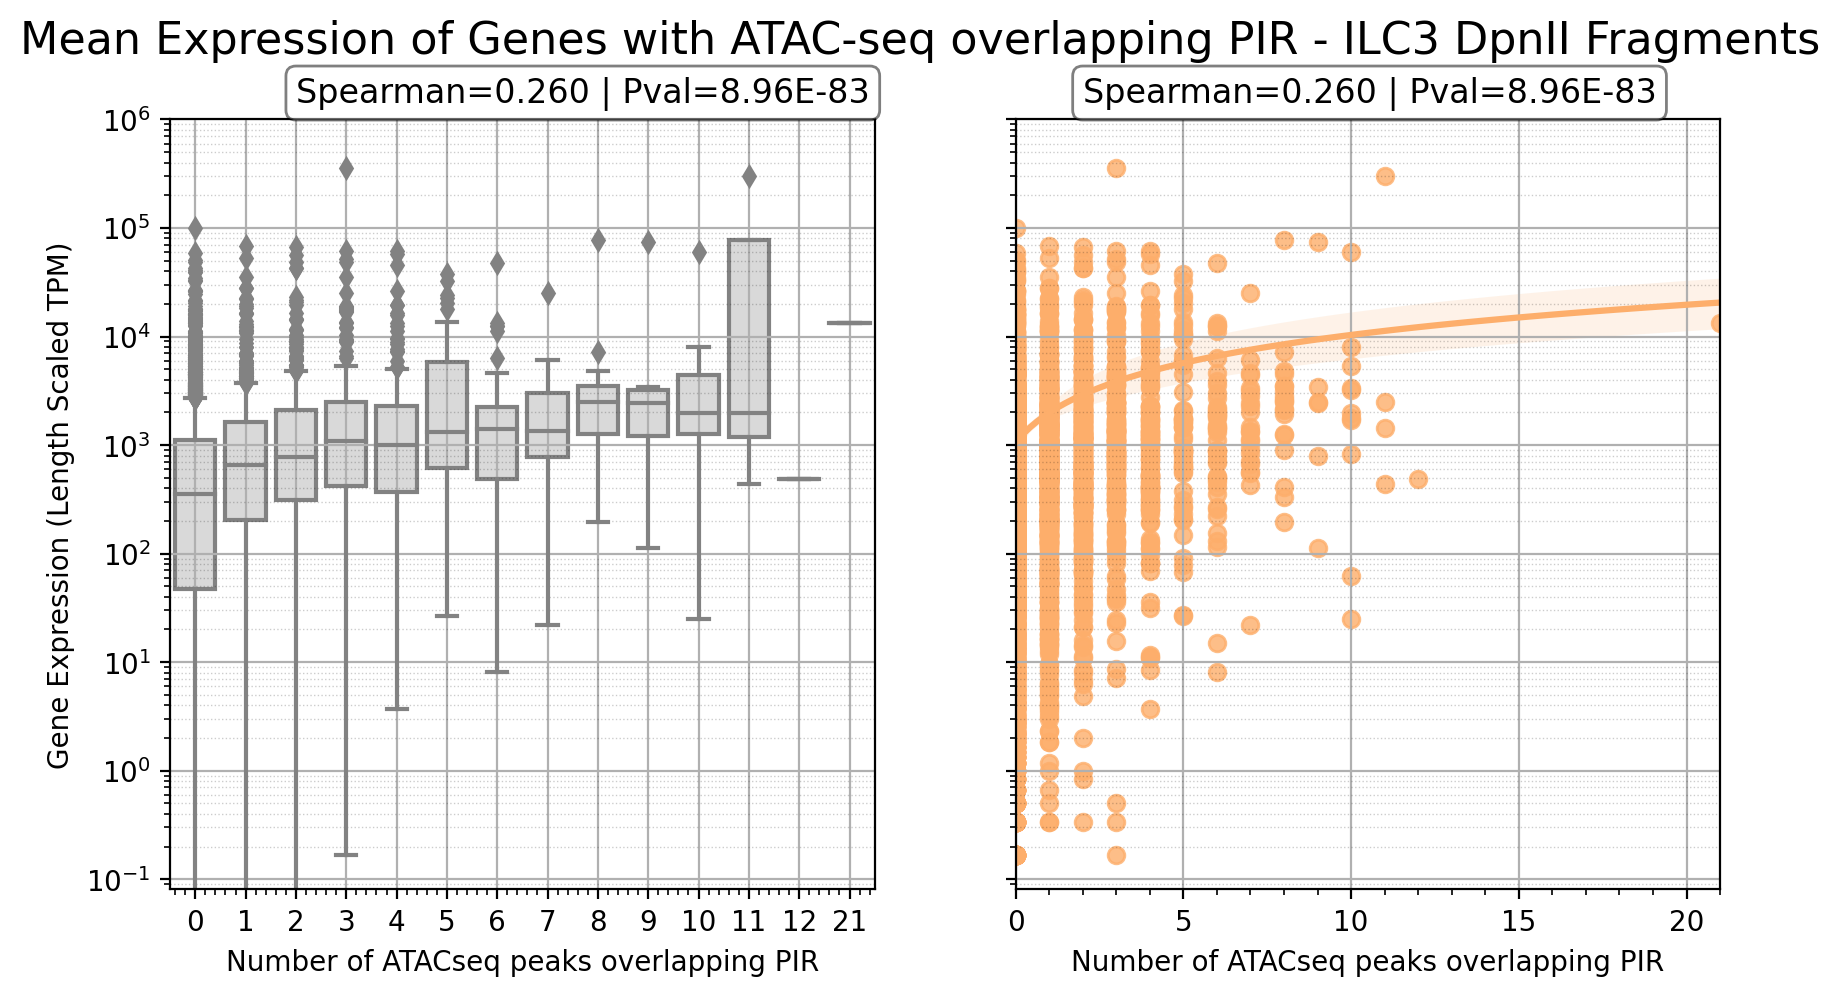

In [11]:
ILC3_results_atac_frags_all = utils.expression_cutoff_analysis(GENE_COUNTS, 
                                                               feature_col="ILC3_ATAC_count_fragments", 
                                                               mean_col="ILC3_mean",
                                                               plot=True,
                                                               title="Mean Expression of Genes with ATAC-seq overlapping PIR - ILC3 DpnII Fragments",
                                                               xlabel="Number of ATACseq peaks overlapping PIR", 
                                                               plot_filename="./figures/ILC3_mean_expression_PIRwATAC_DpnII_fragments")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


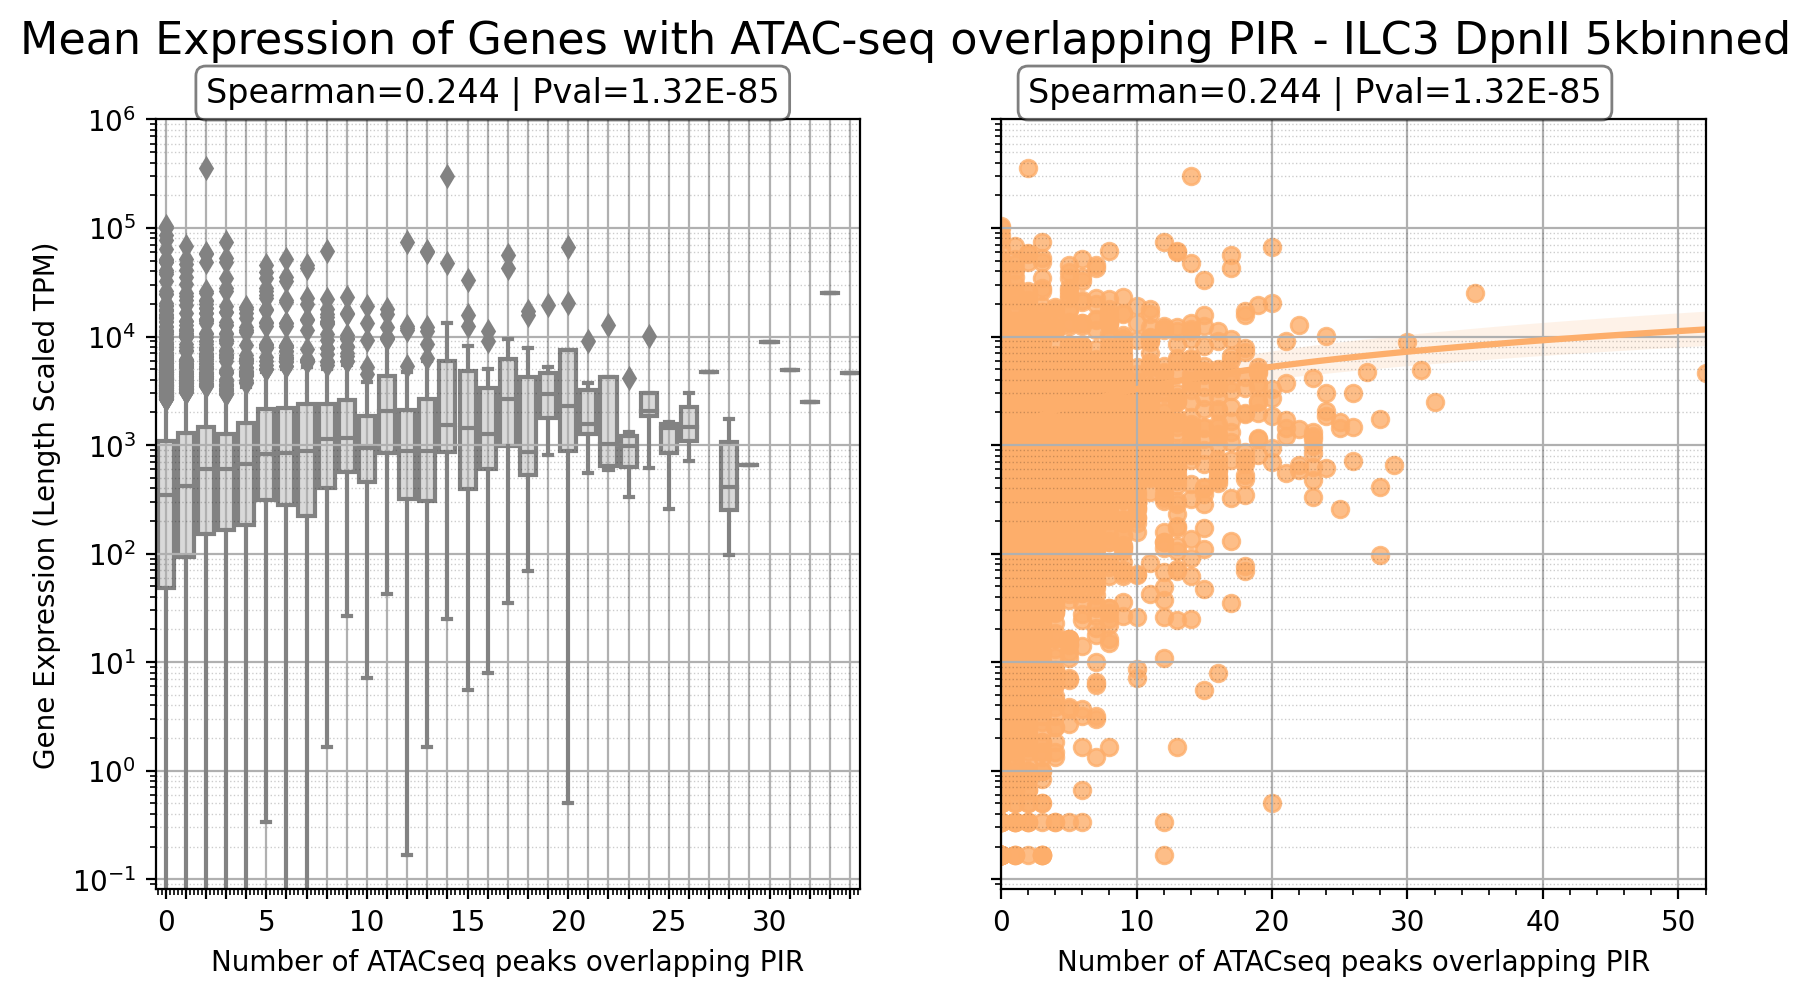

In [12]:
ILC3_results_atac_bins_all = utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="ILC3_ATAC_count_bins", mean_col="ILC3_mean", plot=True, title="Mean Expression of Genes with ATAC-seq overlapping PIR - ILC3 DpnII 5kbinned",
           xlabel="Number of ATACseq peaks overlapping PIR", plot_filename="./figures/ILC3_mean_expression_PIRwATAC_DpnII_5kbinned")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


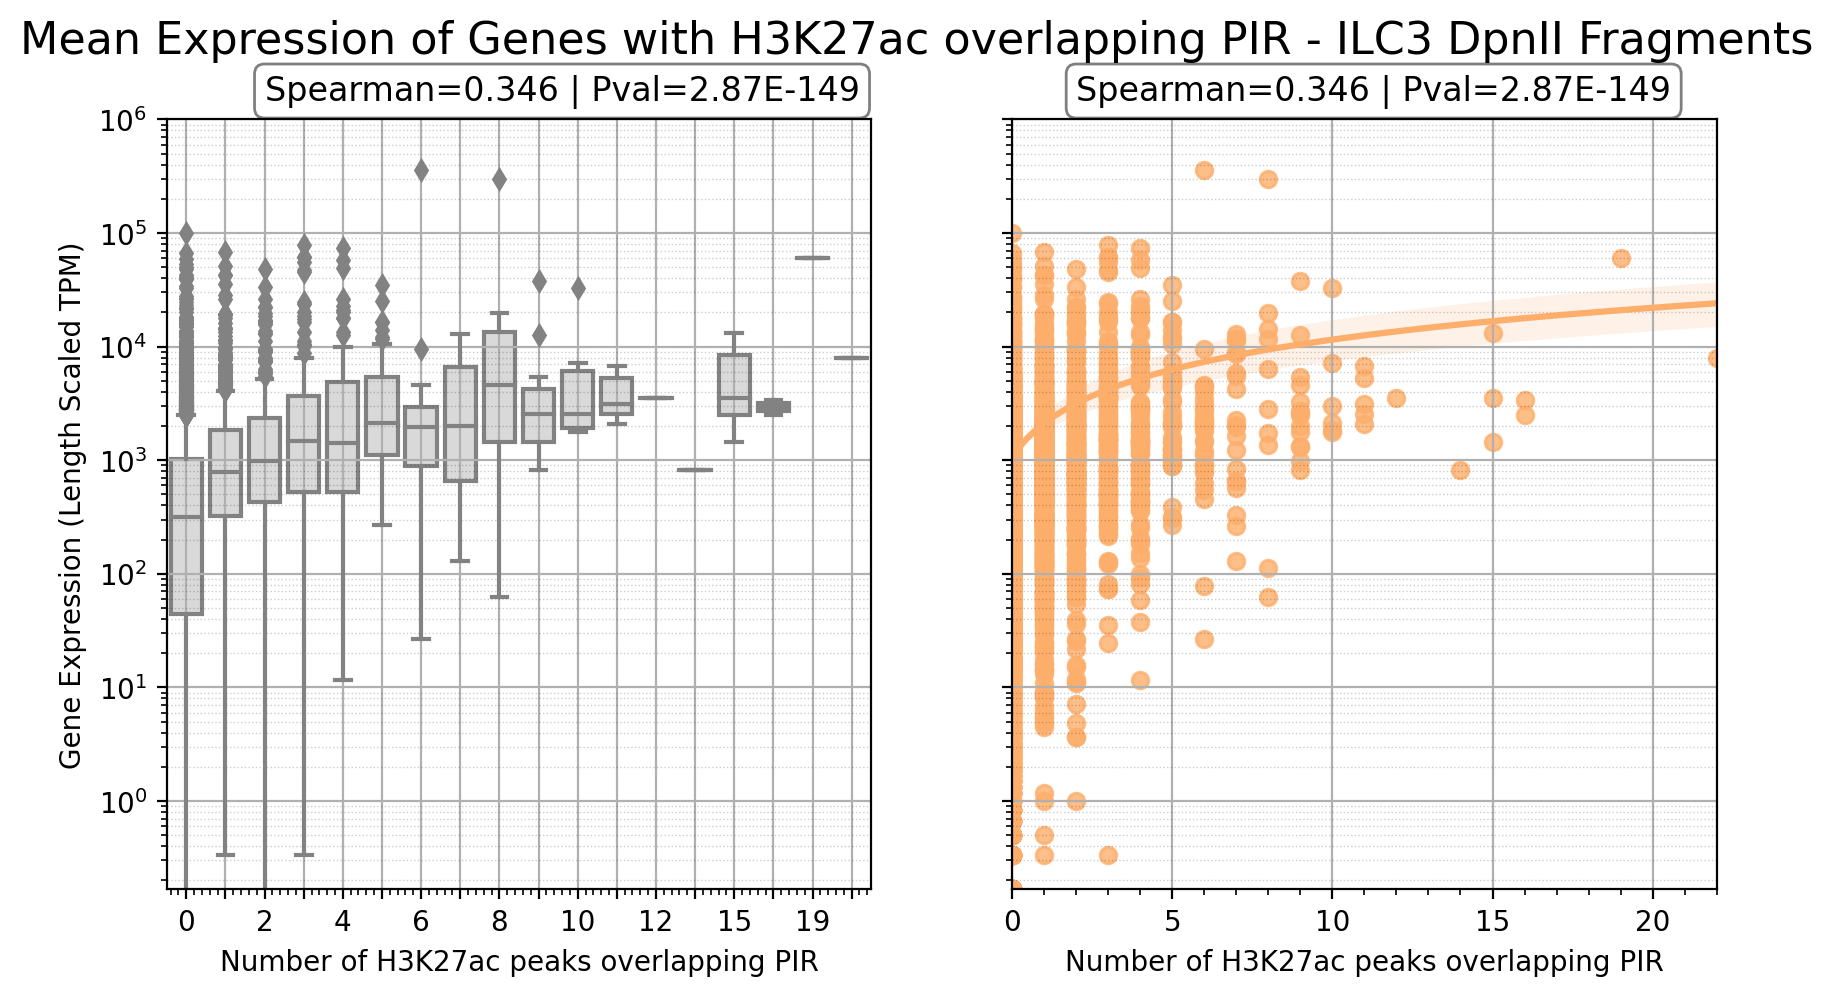

In [13]:
ILC3_results_Acetyl_frags_all= utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="ILC3_H3K27ac_count_fragments", plot=True, mean_col="ILC3_mean", title="Mean Expression of Genes with H3K27ac overlapping PIR - ILC3 DpnII Fragments",
           xlabel="Number of H3K27ac peaks overlapping PIR", plot_filename="./figures/ILC3_mean_expression_PIRwH3K27ac_DpnII_fragments")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


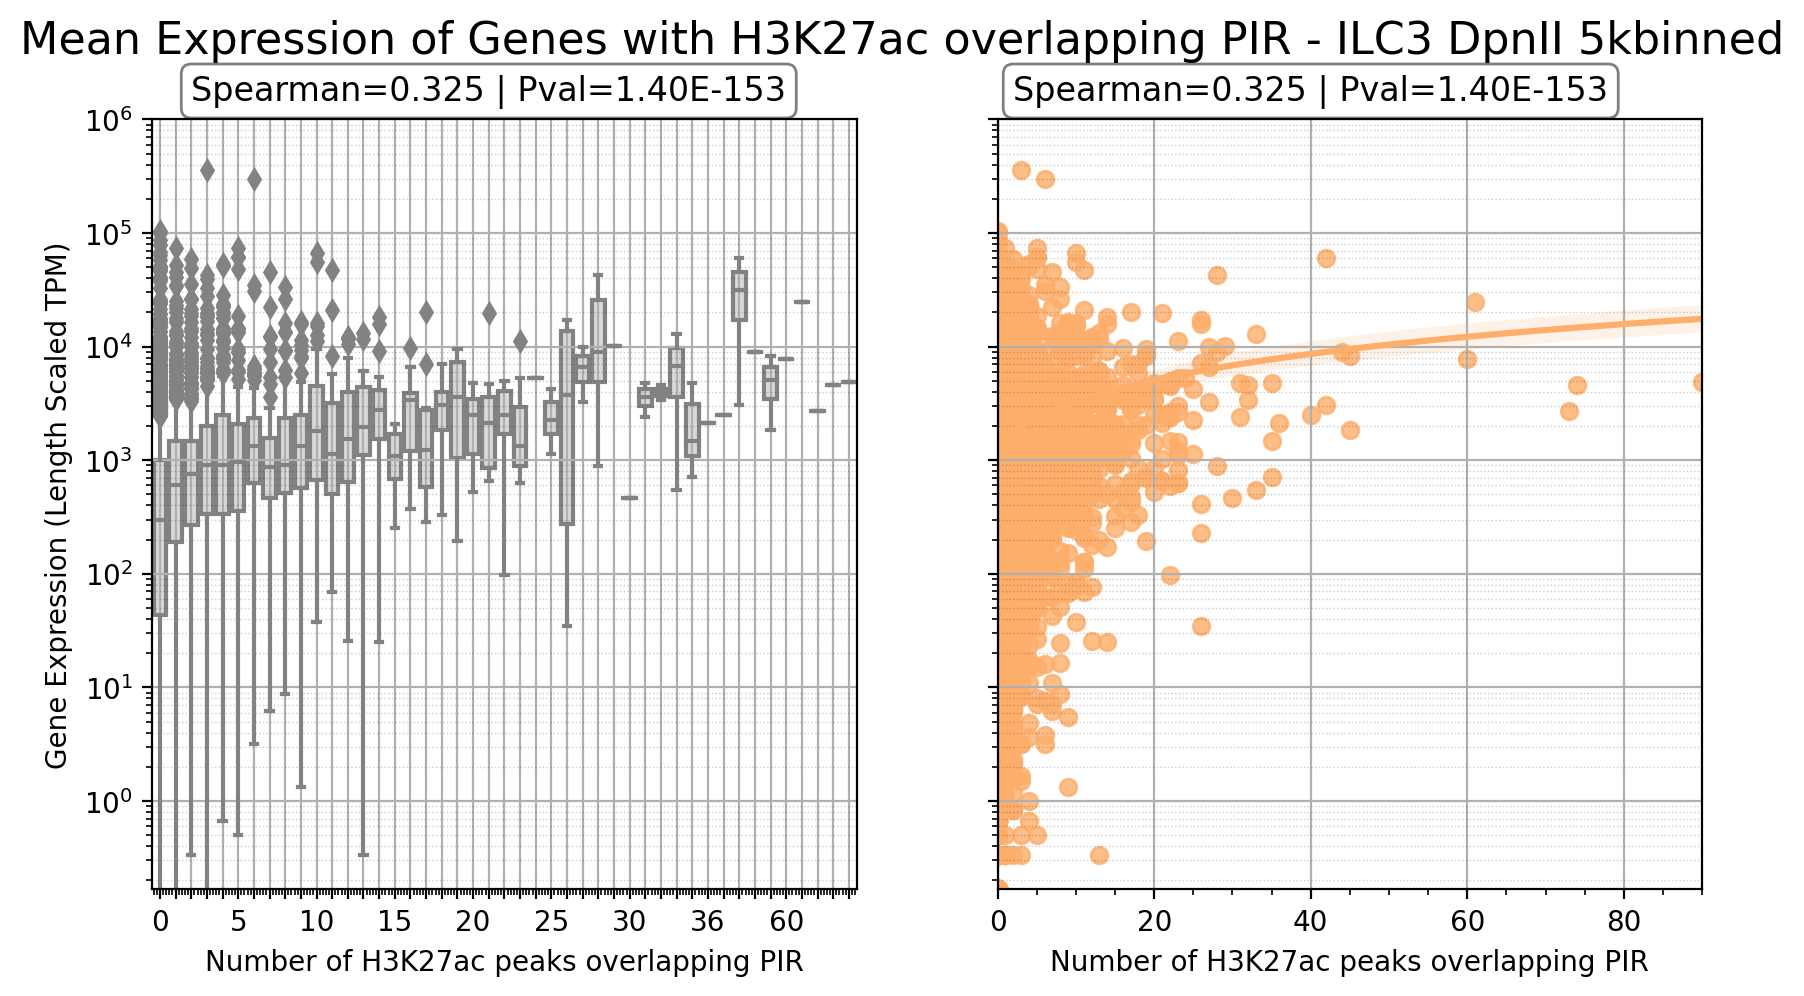

In [14]:
ILC3_results_Acetyl_bins_all= utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="ILC3_H3K27ac_count_bins",  plot=True, mean_col="ILC3_mean", title="Mean Expression of Genes with H3K27ac overlapping PIR - ILC3 DpnII 5kbinned",
           xlabel="Number of H3K27ac peaks overlapping PIR",
           plot_filename="./figures/ILC3_mean_expression_PIRwH3K27ac_DpnII_5kbinned")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


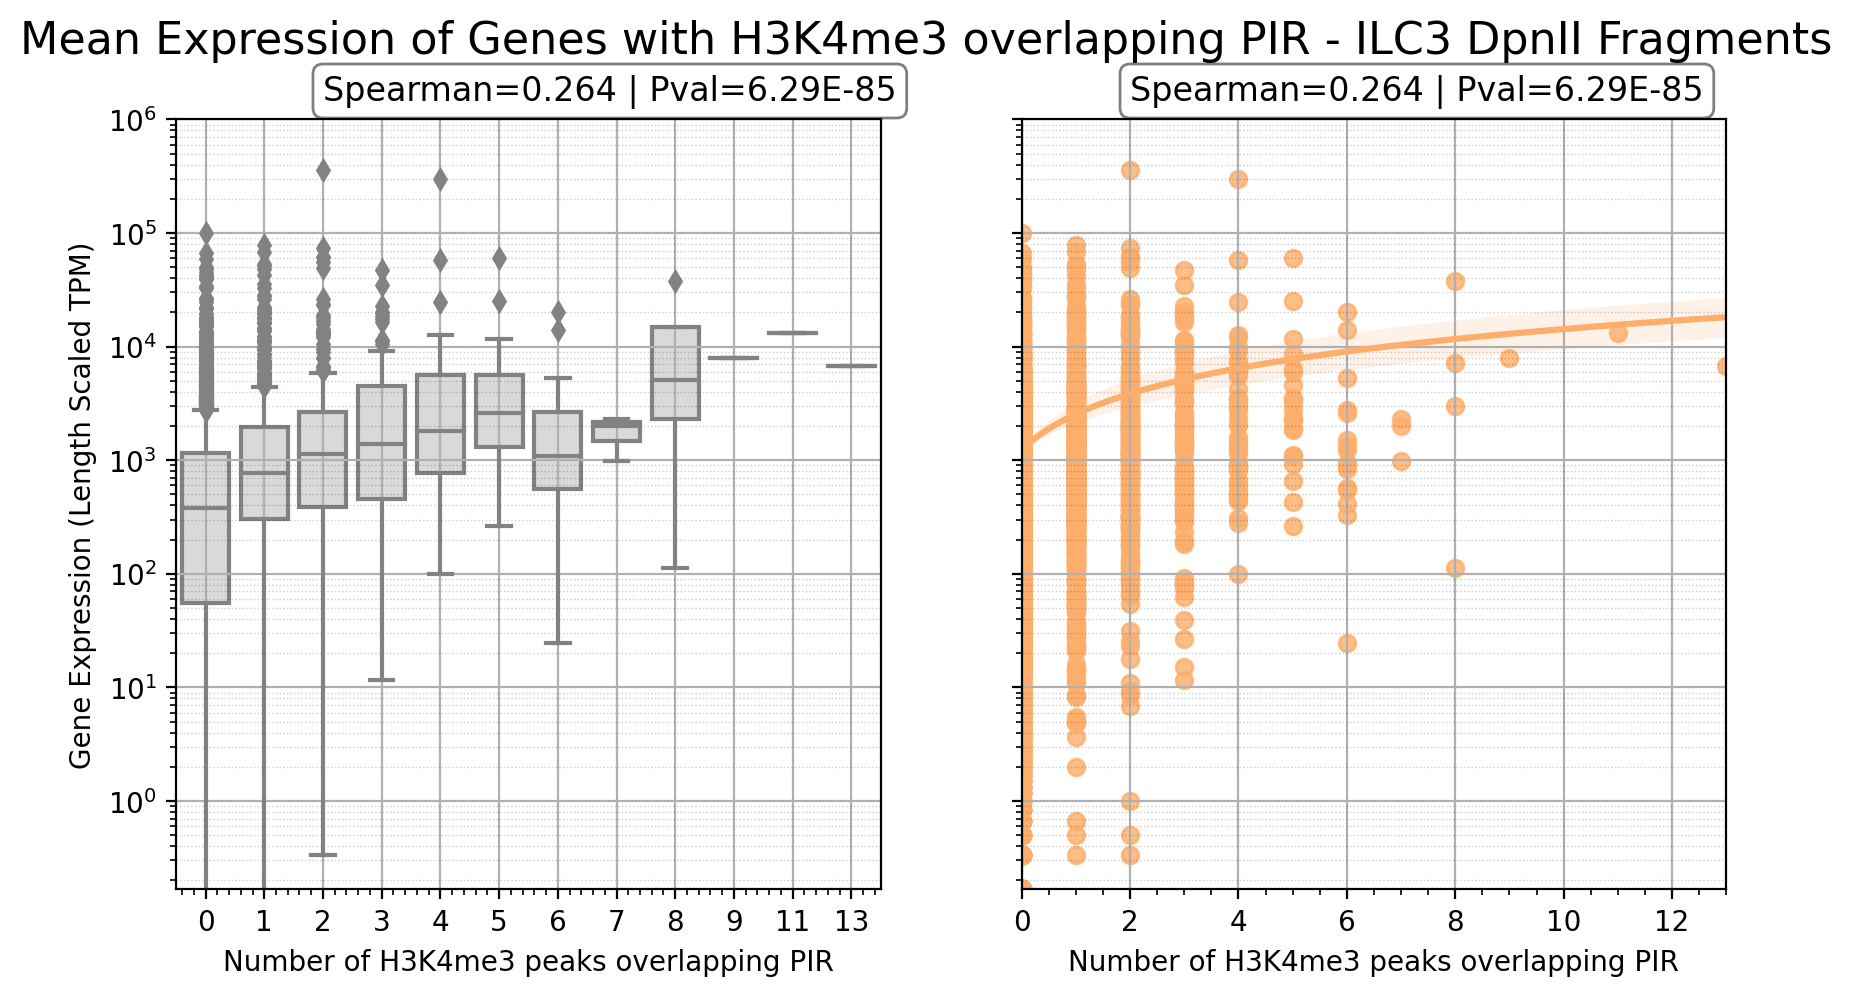

In [15]:
ILC3_results_methyl_frags_all= utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="ILC3_H3K4me3_count_fragments",  plot=True, mean_col="ILC3_mean", title="Mean Expression of Genes with H3K4me3 overlapping PIR - ILC3 DpnII Fragments",
           xlabel="Number of H3K4me3 peaks overlapping PIR",
           plot_filename="./figures/ILC3_mean_expression_PIRwH3K4me3_DpnII_fragments")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


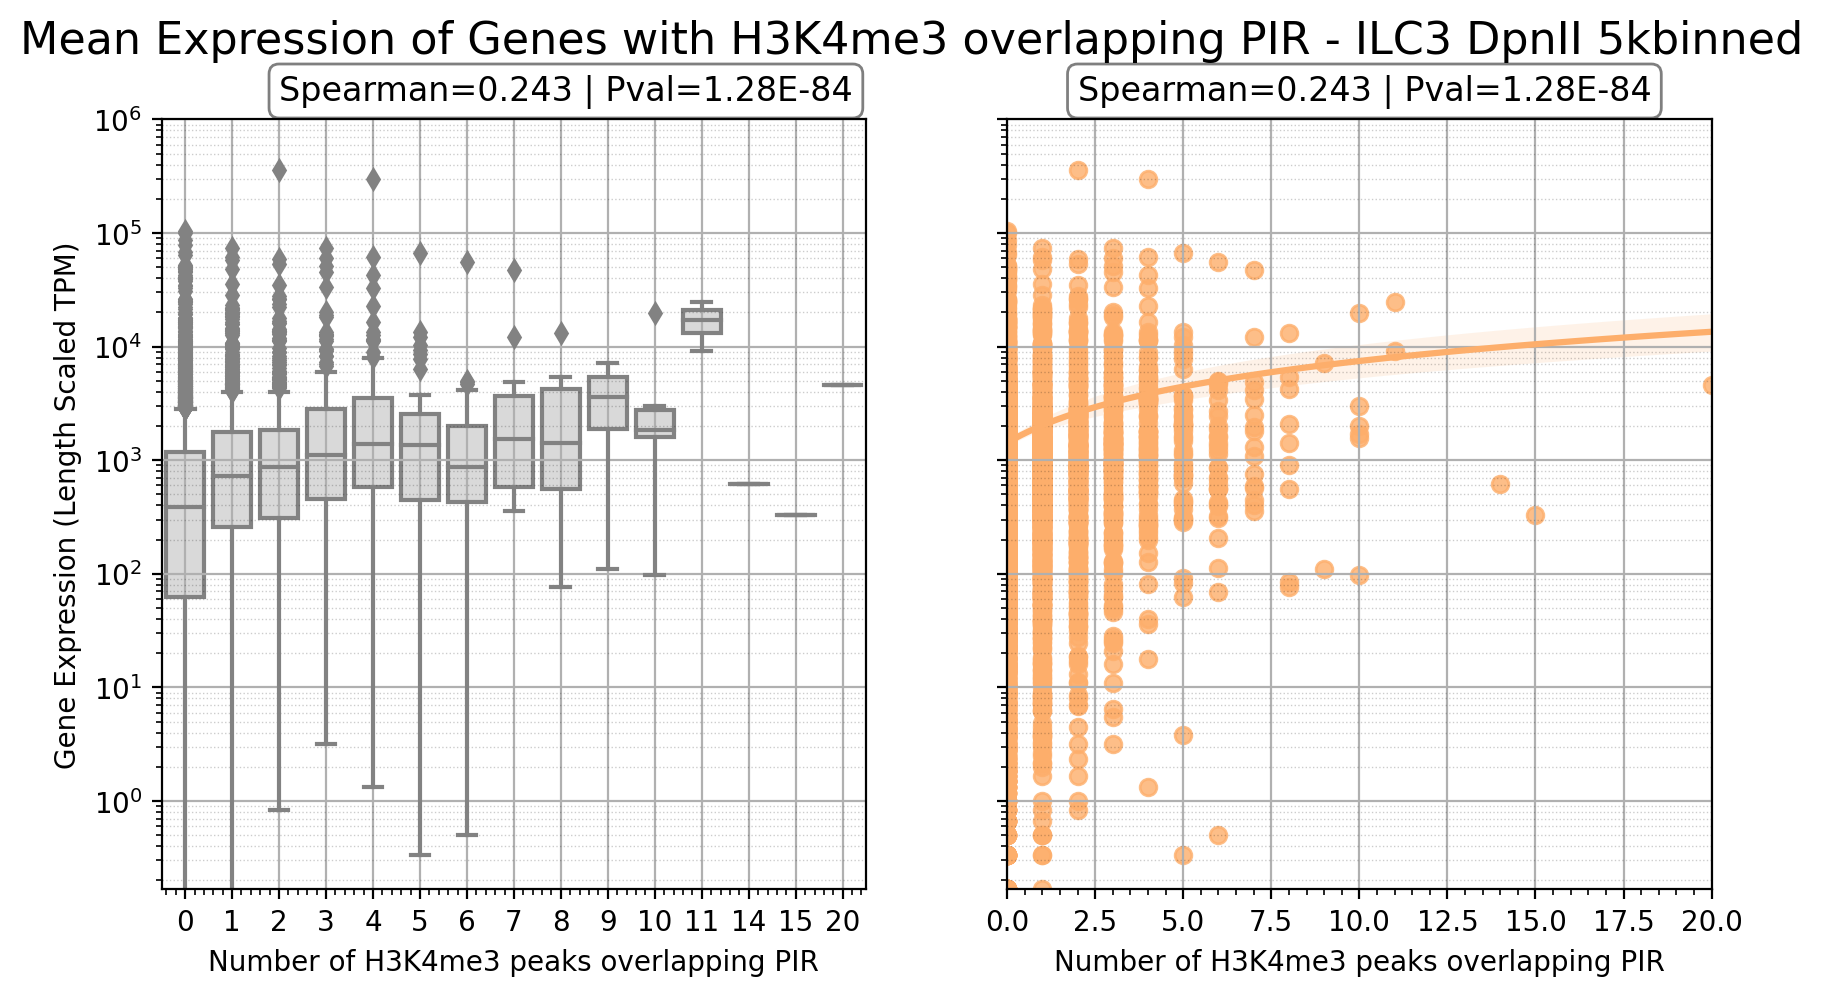

In [16]:
ILC3_results_methyl_bins_all= utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="ILC3_H3K4me3_count_bins",  plot=True, mean_col="ILC3_mean", title="Mean Expression of Genes with H3K4me3 overlapping PIR - ILC3 DpnII 5kbinned",
           xlabel="Number of H3K4me3 peaks overlapping PIR",
           plot_filename="./figures/ILC3_mean_expression_PIRwH3K4me3_DpnII_5kbinned")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


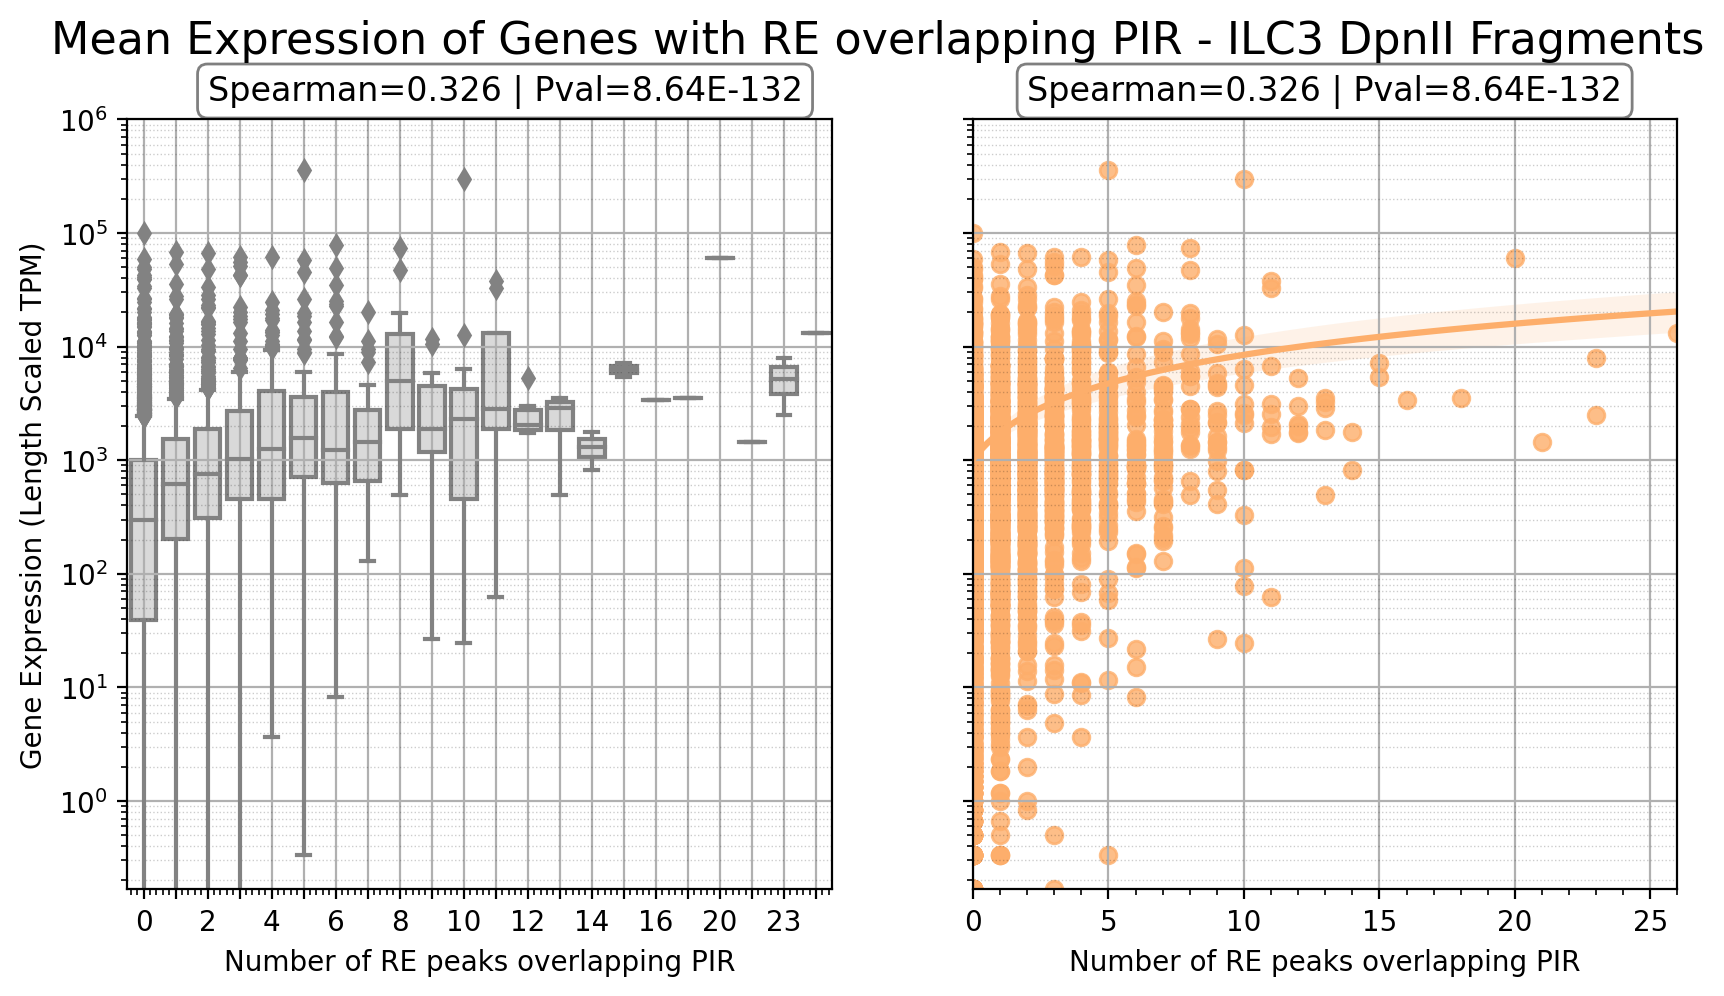

In [17]:
ILC3_results_methyl_bins_all= utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="ILC3_RE_count_fragments",  plot=True, mean_col="ILC3_mean", title="Mean Expression of Genes with RE overlapping PIR - ILC3 DpnII Fragments",
           xlabel="Number of RE peaks overlapping PIR",
           plot_filename="./figures/ILC3_mean_expression_PIRwRE_DpnII_fragments")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


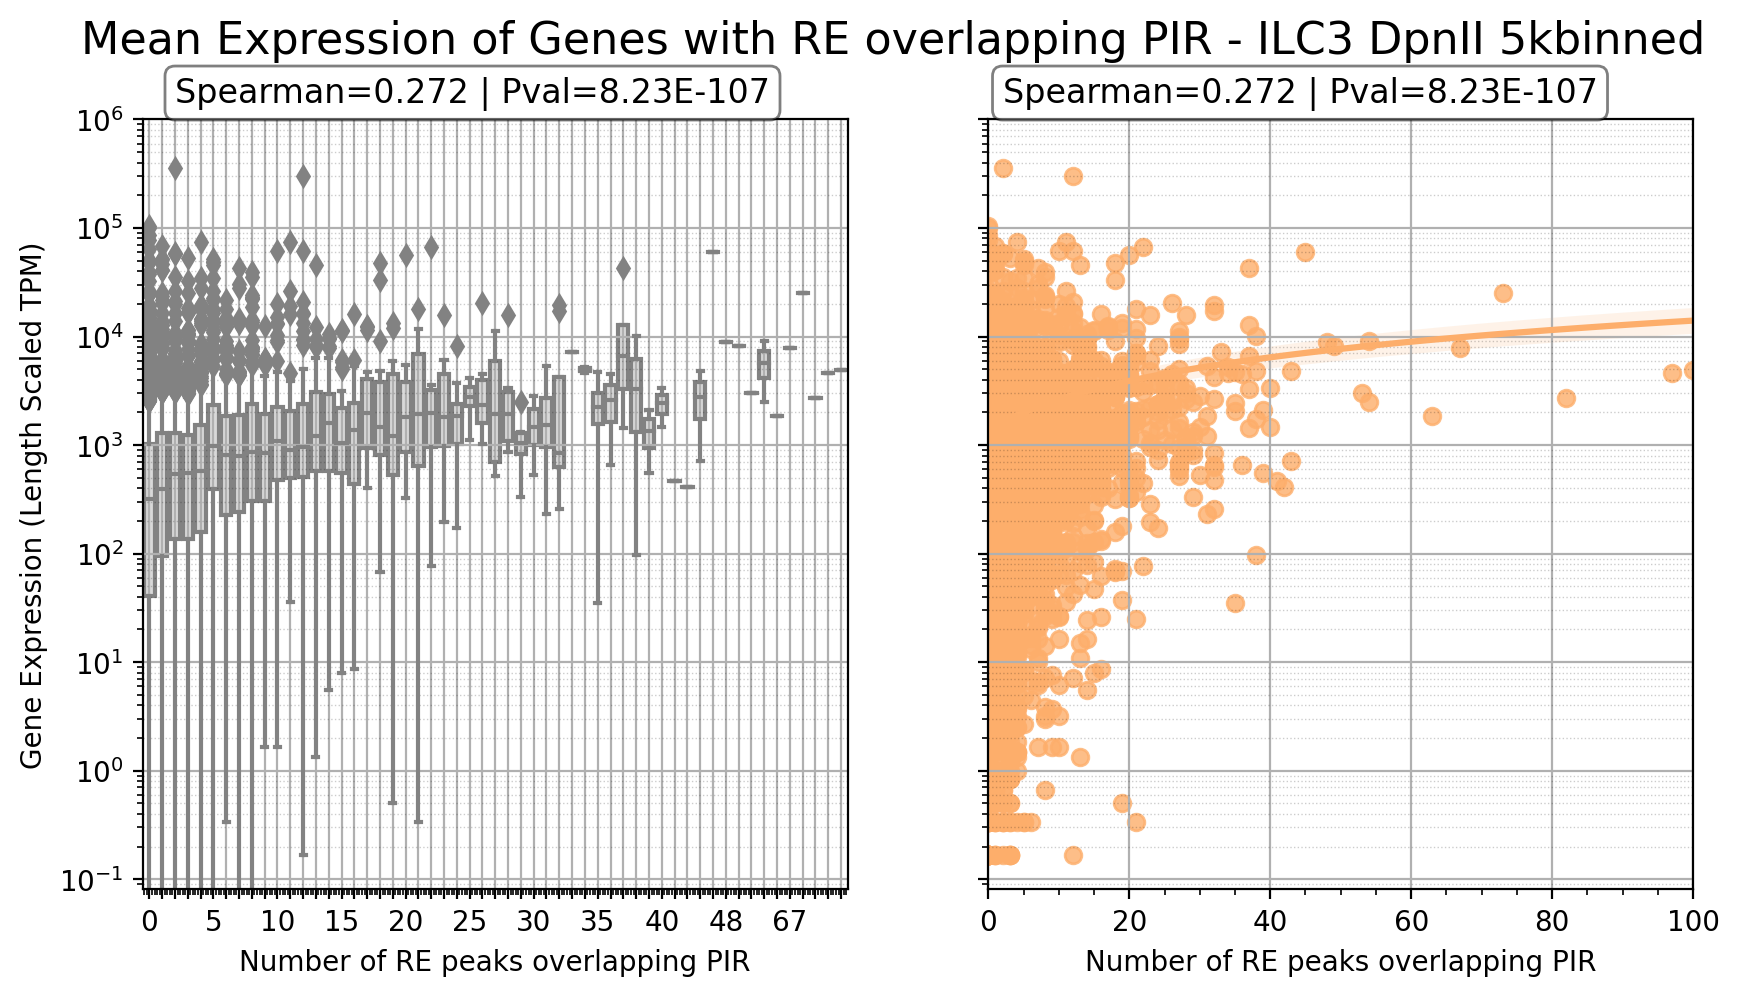

In [18]:
ILC3_results_methyl_bins_all= utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="ILC3_RE_count_bins",  plot=True, mean_col="ILC3_mean", title="Mean Expression of Genes with RE overlapping PIR - ILC3 DpnII 5kbinned",
           xlabel="Number of RE peaks overlapping PIR",
           plot_filename="./figures/ILC3_mean_expression_PIRwRE_DpnII_5kbinned")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


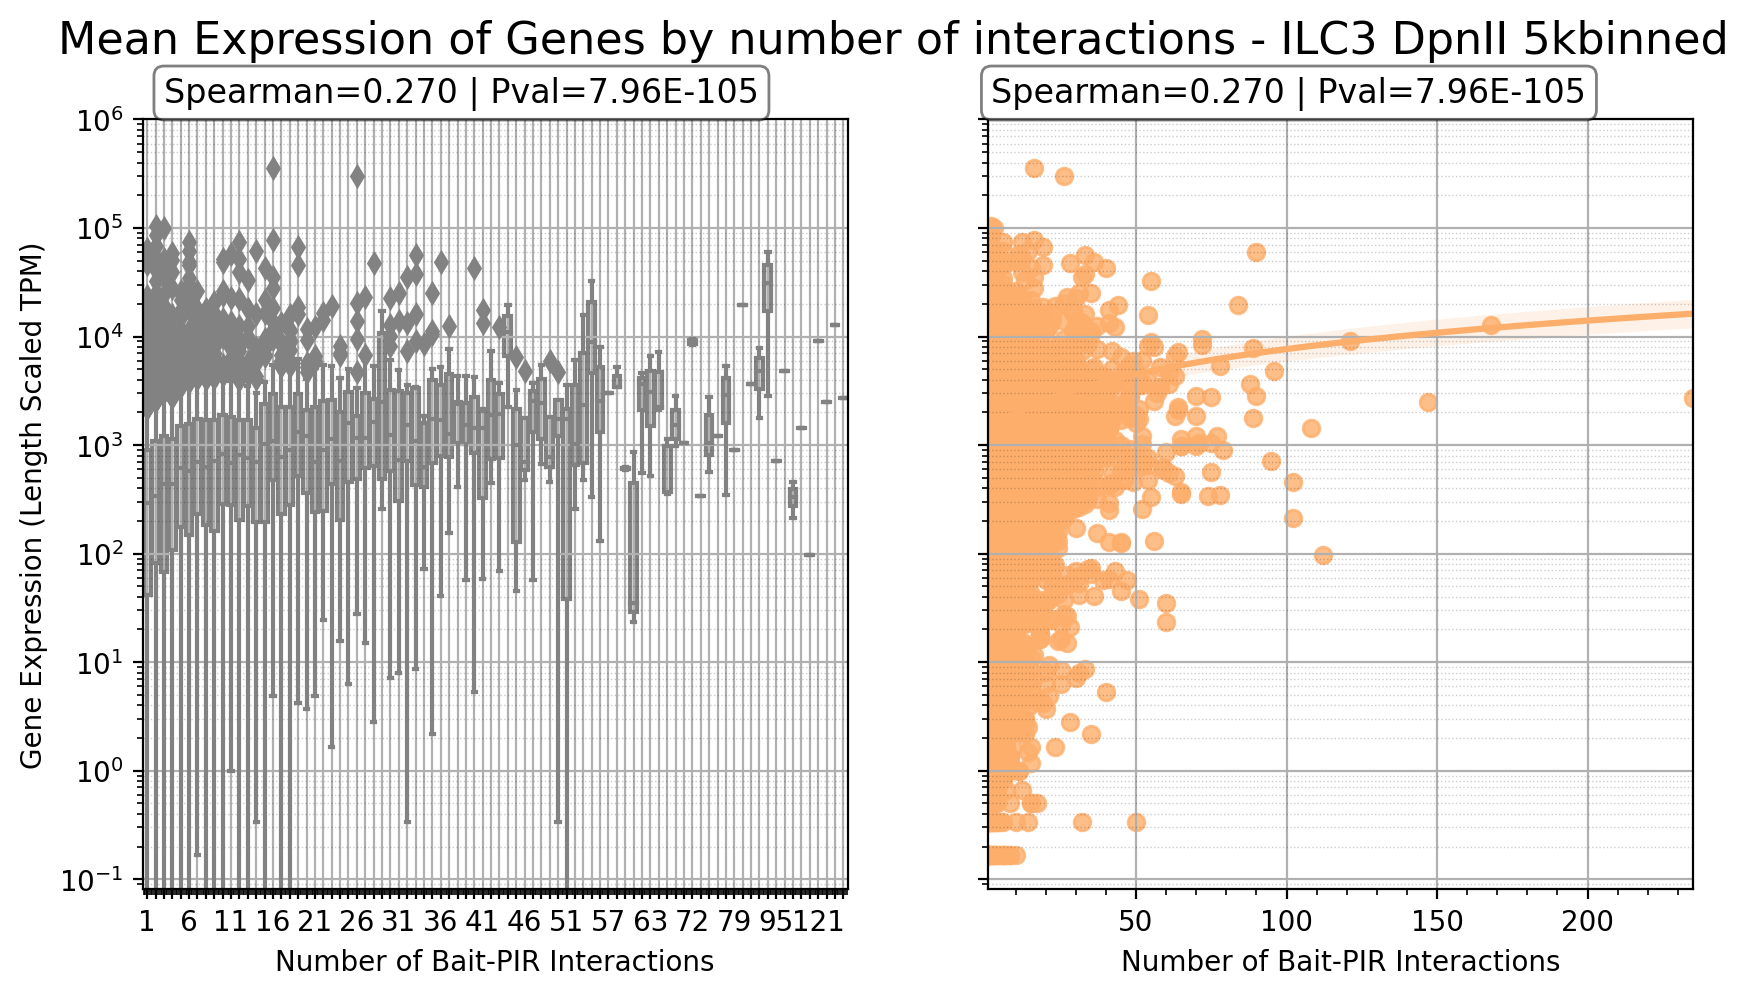

In [19]:
ILC3_results_enhancer_bins_all= utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="ILC3_enhancer_count_bins",  plot=True, mean_col="ILC3_mean", title="Mean Expression of Genes by number of interactions - ILC3 DpnII 5kbinned",
           plot_filename="./figures/ILC3_mean_expression_NumberInteractions_DpnII_5kbinned")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


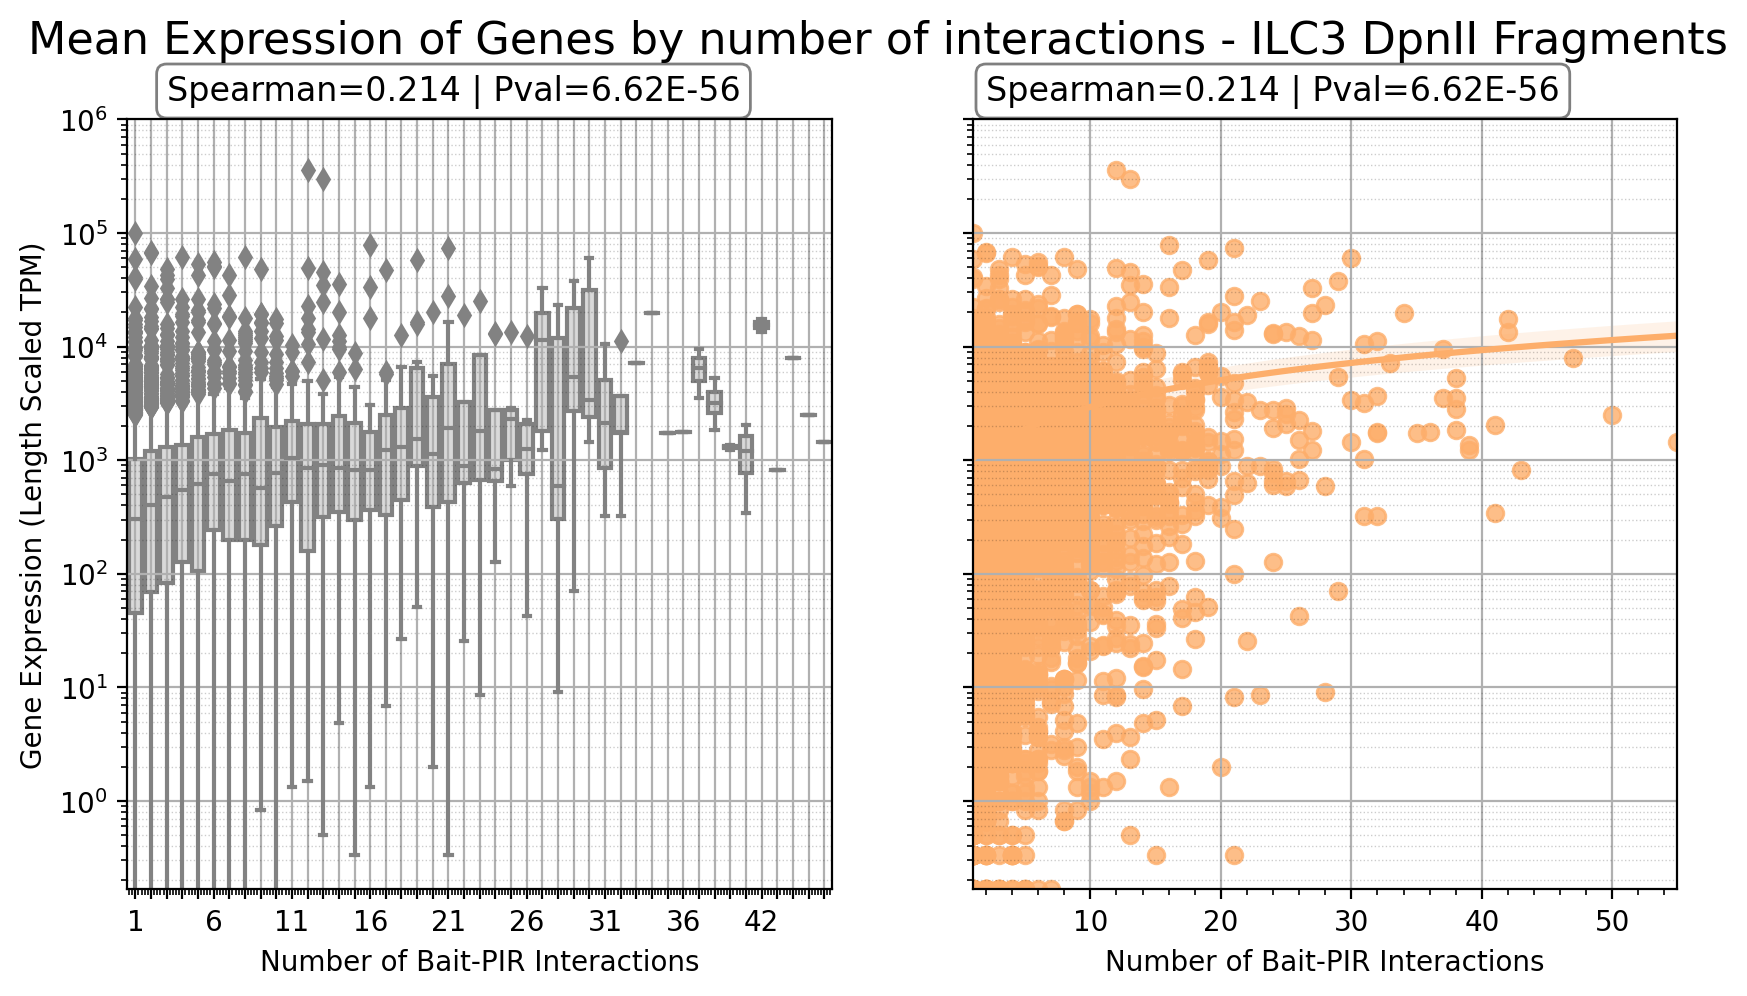

In [20]:
ILC3_results_enhancer_frags_all= utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="ILC3_enhancer_counts_fragments",  plot=True, mean_col="ILC3_mean", title="Mean Expression of Genes by number of interactions - ILC3 DpnII Fragments",
           plot_filename="./figures/ILC3_mean_expression_NumberInteractions_DpnII_fragments")

### CD4

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


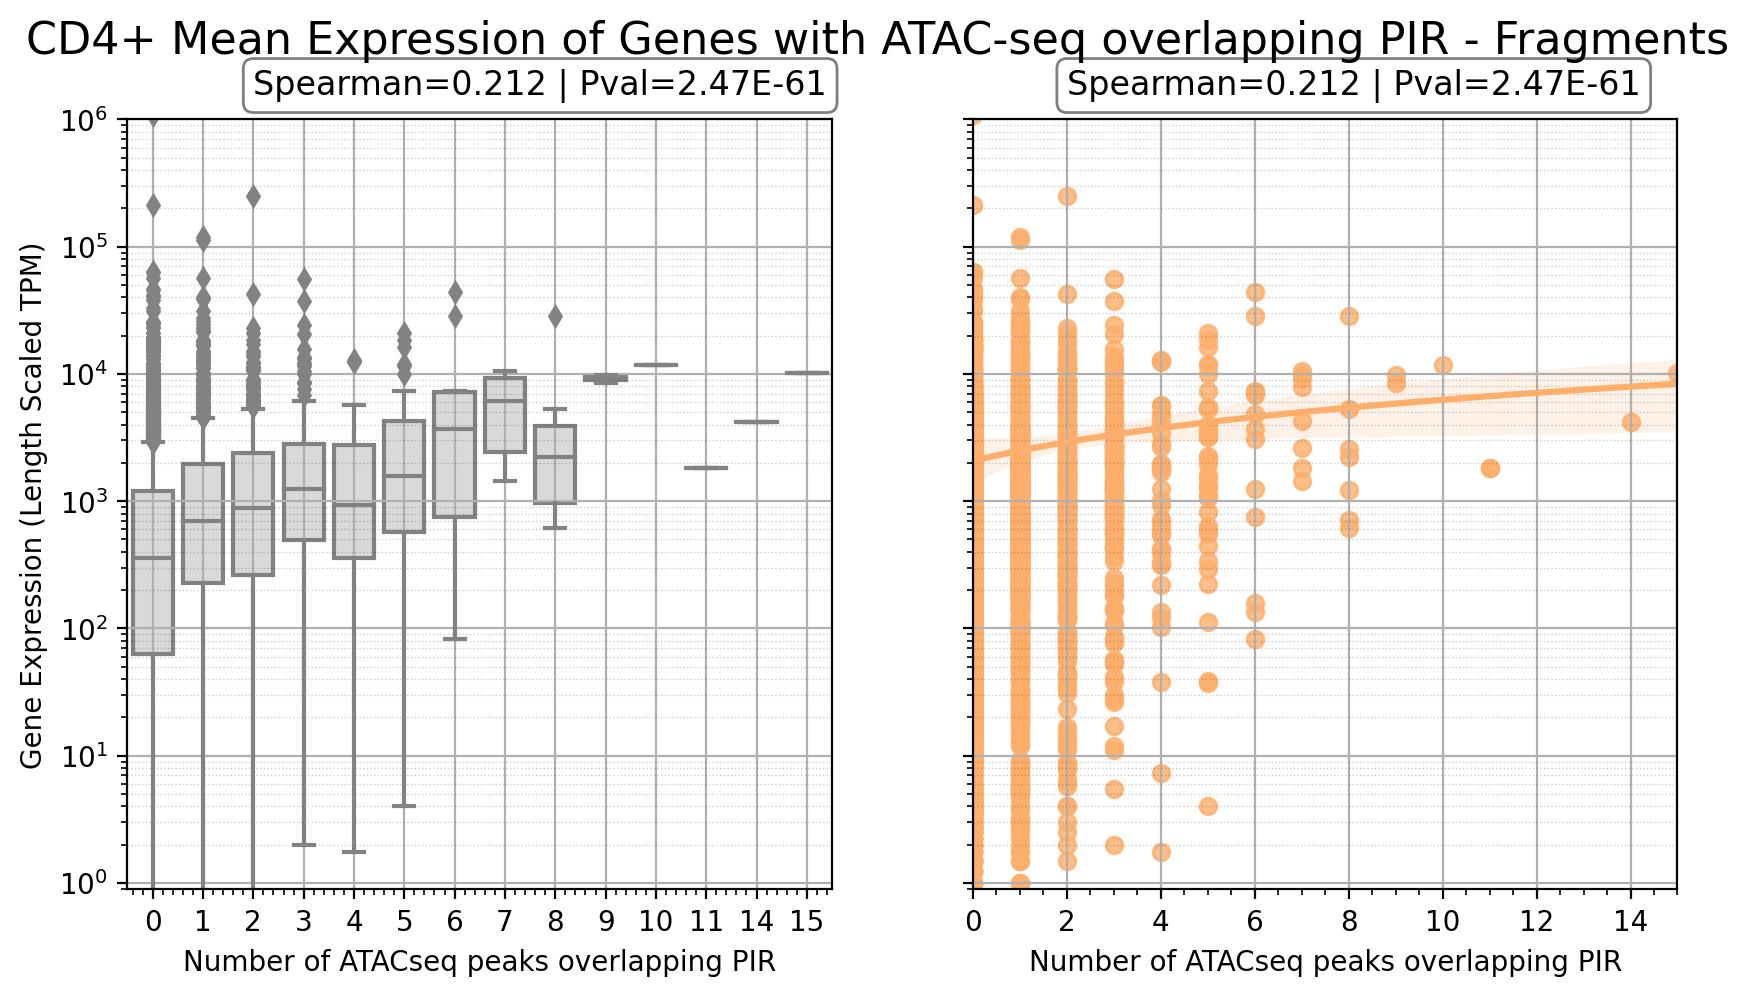

In [21]:
utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="CD4_DpnII_ATAC_count_fragments",  plot=True, mean_col="CD4_mean", title="CD4+ Mean Expression of Genes with ATAC-seq overlapping PIR - Fragments",
           xlabel="Number of ATACseq peaks overlapping PIR",
           plot_filename="./figures/CD4_mean_expression_PIRwATAC_DpnII_fragments")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


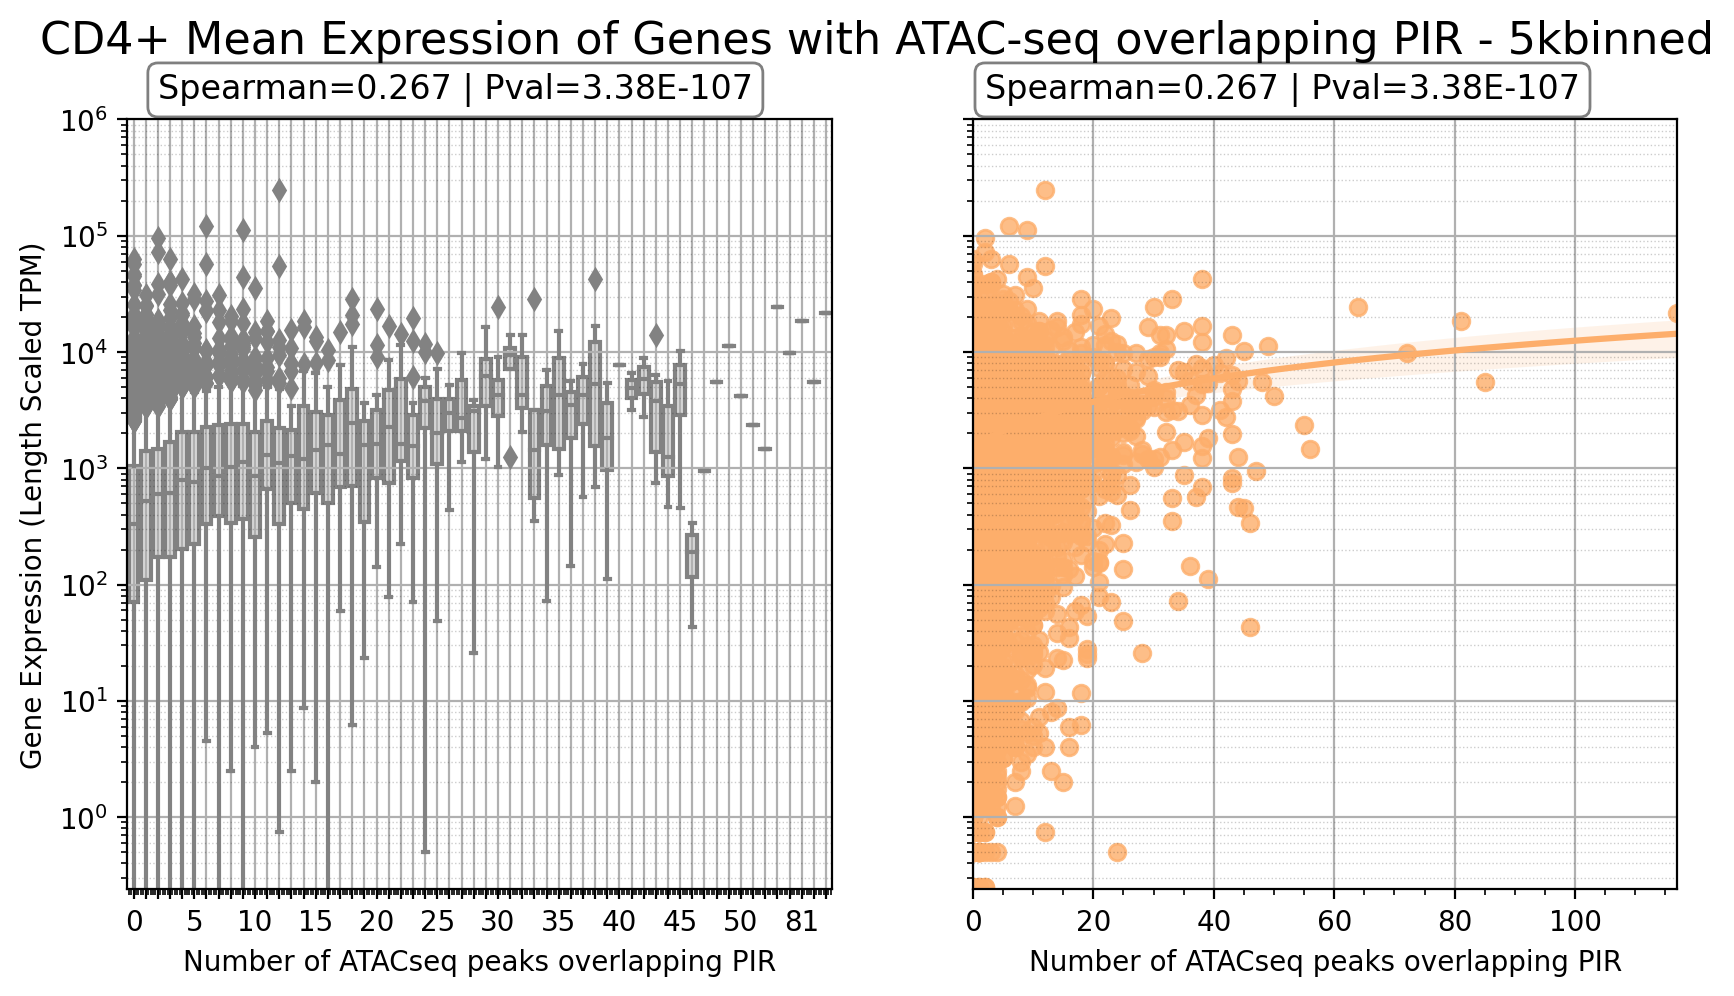

In [22]:
utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="CD4_DpnII_ATAC_count_bins",  plot=True, mean_col="CD4_mean", title="CD4+ Mean Expression of Genes with ATAC-seq overlapping PIR - 5kbinned",
           xlabel="Number of ATACseq peaks overlapping PIR",
           plot_filename="./figures/CD4_mean_expression_PIRwATAC_DpnII_5kbinned")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


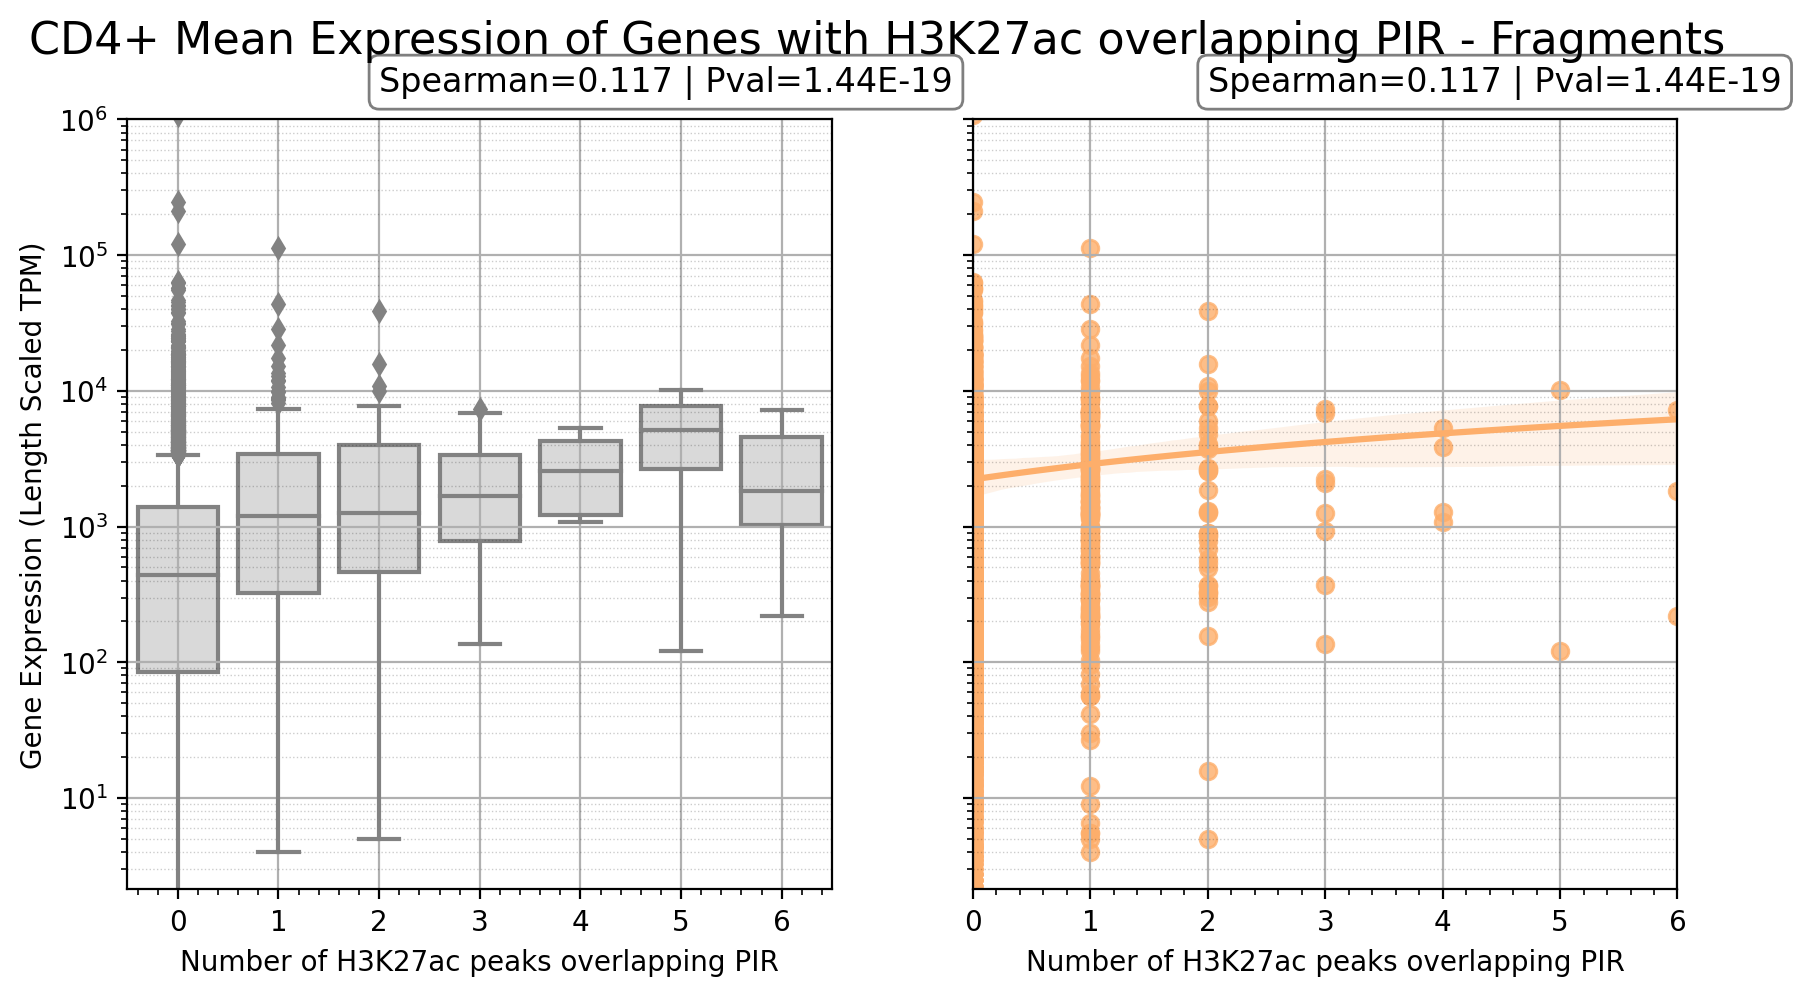

In [23]:
utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="CD4_DpnII_H3K27ac_count_fragments",  plot=True, mean_col="CD4_mean", title="CD4+ Mean Expression of Genes with H3K27ac overlapping PIR - Fragments",
           xlabel="Number of H3K27ac peaks overlapping PIR",
           plot_filename="./figures/CD4_mean_expression_PIRwH3K27ac_DpnII_fragments")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


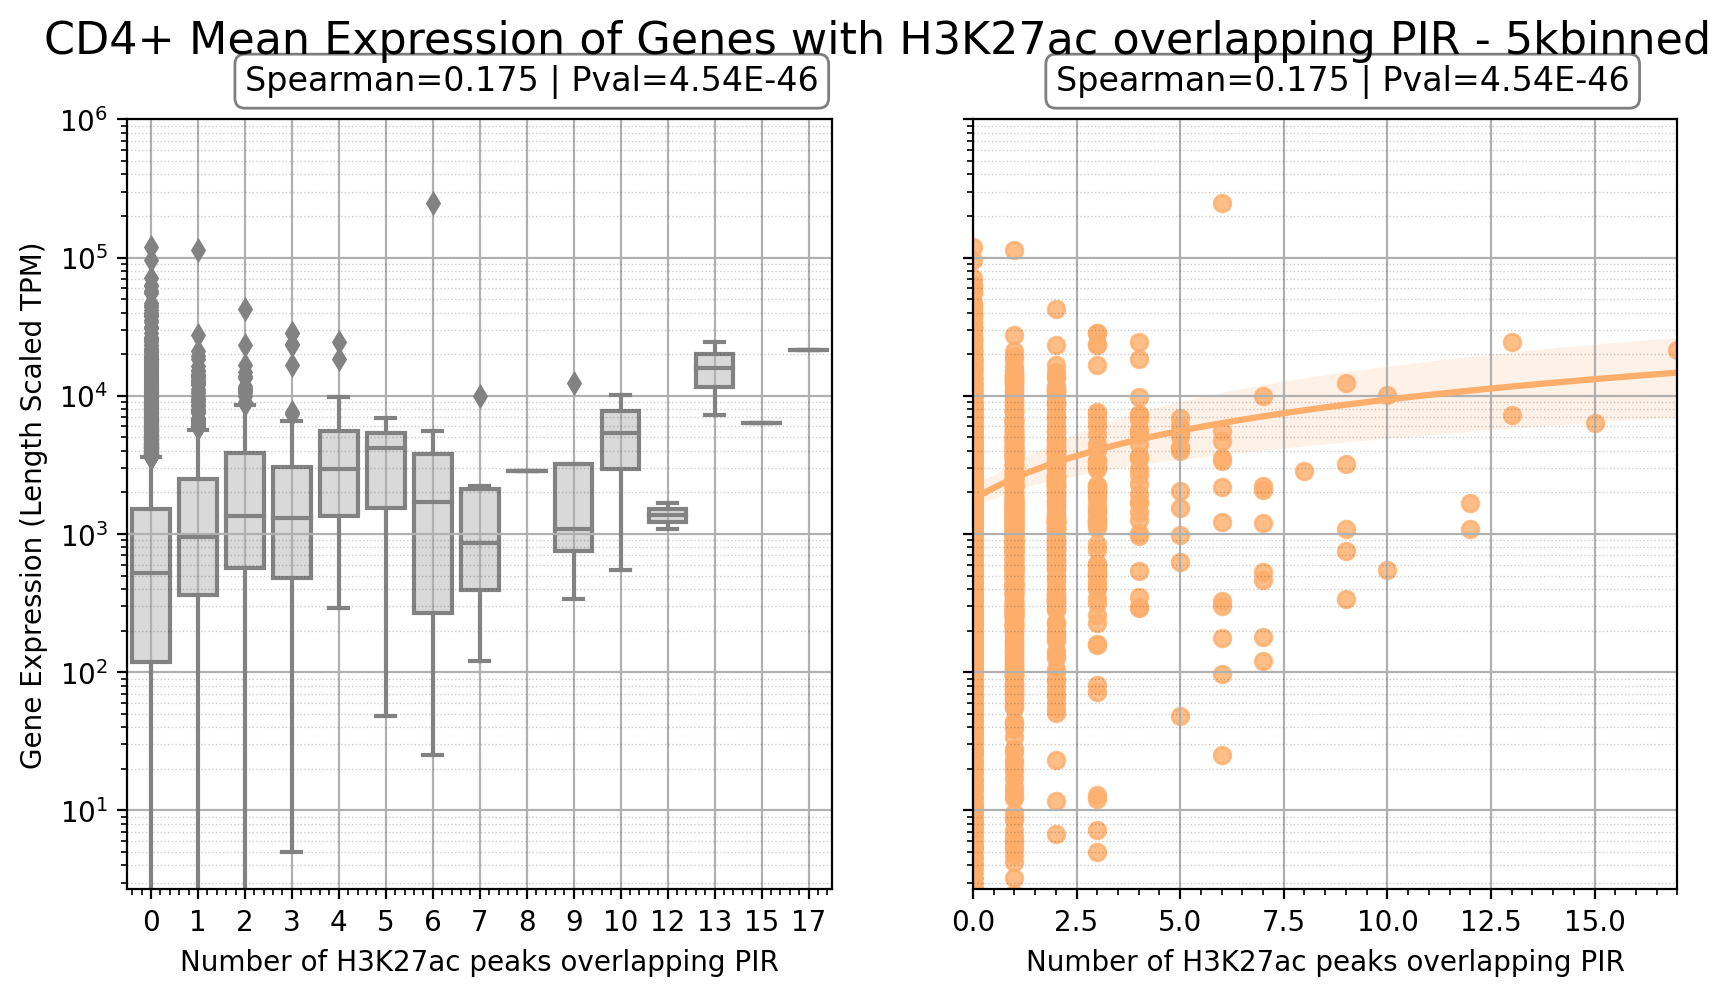

In [24]:
utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="CD4_DpnII_H3K27ac_count_bins",  plot=True, mean_col="CD4_mean", title="CD4+ Mean Expression of Genes with H3K27ac overlapping PIR - 5kbinned",
           xlabel="Number of H3K27ac peaks overlapping PIR",
           plot_filename="./figures/CD4_mean_expression_PIRwH3K27ac_DpnII_5kbinned")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


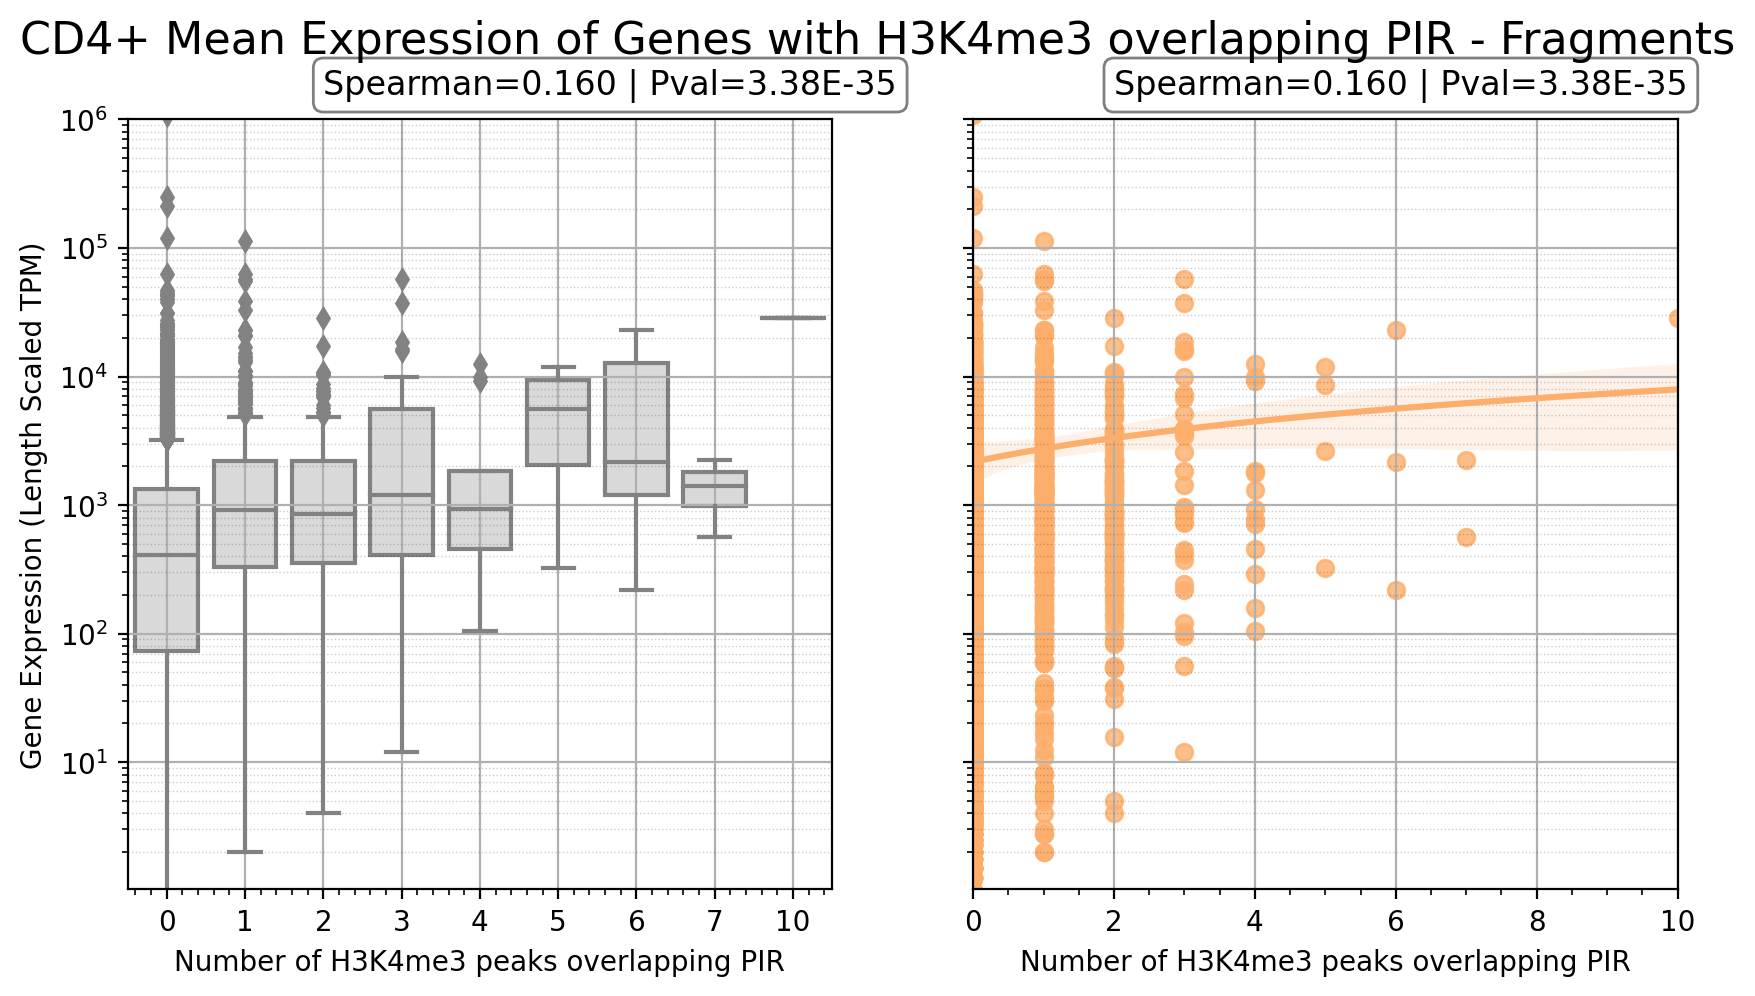

In [25]:
utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="CD4_DpnII_H3K4me3_count_fragments",  plot=True, mean_col="CD4_mean", title="CD4+ Mean Expression of Genes with H3K4me3 overlapping PIR - Fragments",
           xlabel="Number of H3K4me3 peaks overlapping PIR",
           plot_filename="./figures/CD4_mean_expression_PIRwH3K4me3_DpnII_fragments")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


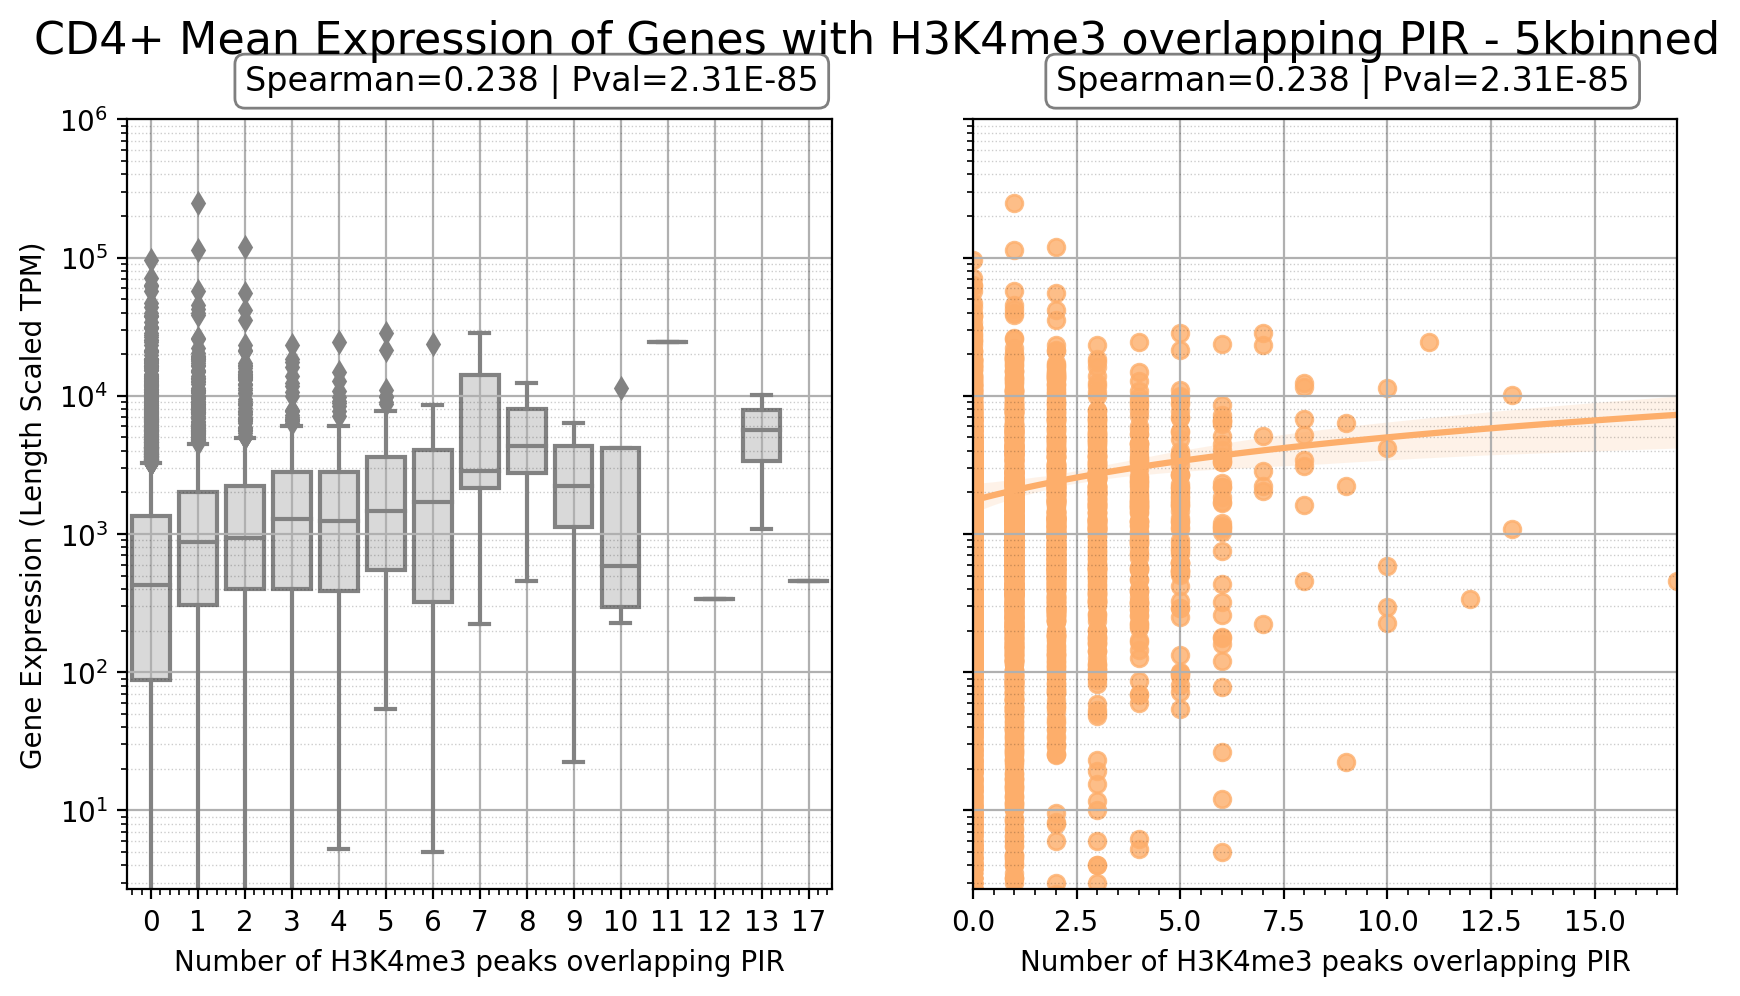

In [26]:
utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="CD4_DpnII_H3K4me3_count_bins",  plot=True, mean_col="CD4_mean", title="CD4+ Mean Expression of Genes with H3K4me3 overlapping PIR - 5kbinned",
           xlabel="Number of H3K4me3 peaks overlapping PIR",
           plot_filename="./figures/CD4_mean_expression_PIRwH3K4me3_DpnII_5kbinned")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


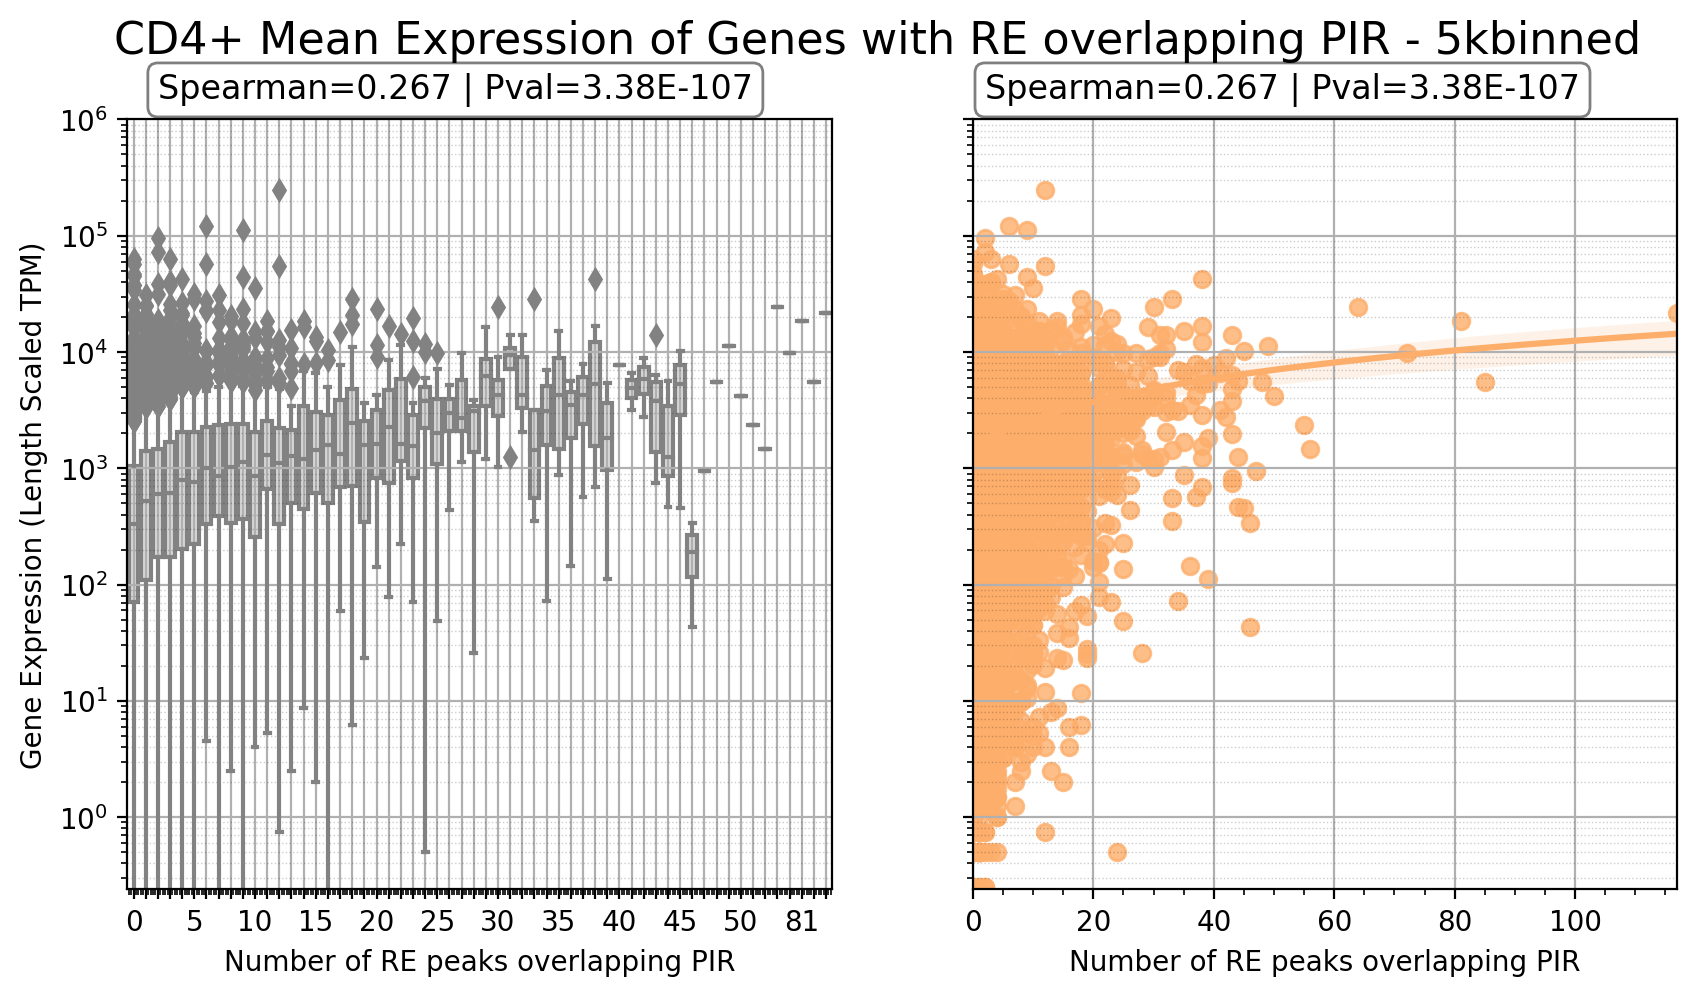

In [27]:
utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="CD4_DpnII_RE_count_bins",  plot=True, mean_col="CD4_mean", title="CD4+ Mean Expression of Genes with RE overlapping PIR - 5kbinned",
           xlabel="Number of RE peaks overlapping PIR",
           plot_filename="./figures/CD4_mean_expression_PIRwRE_DpnII_5kbinned")


/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


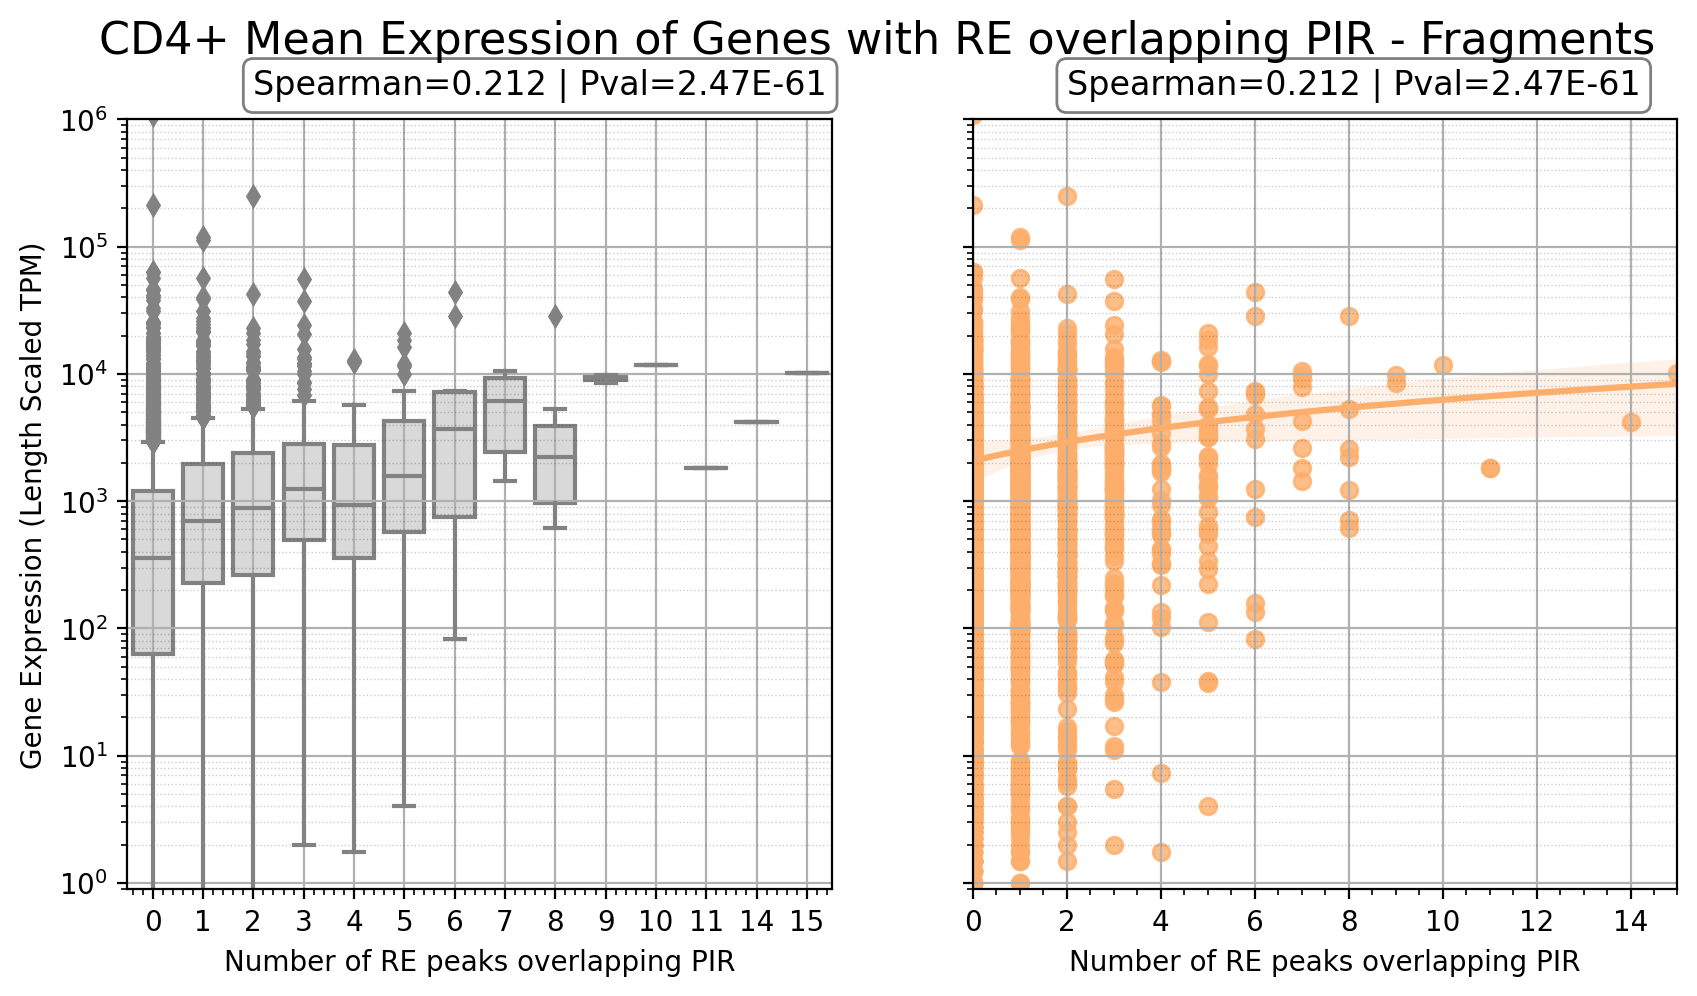

In [28]:
utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="CD4_DpnII_RE_count_fragments",  plot=True, mean_col="CD4_mean", title="CD4+ Mean Expression of Genes with RE overlapping PIR - Fragments",
           xlabel="Number of RE peaks overlapping PIR",
           plot_filename="./figures/CD4_mean_expression_PIRwRE_DpnII_fragments")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


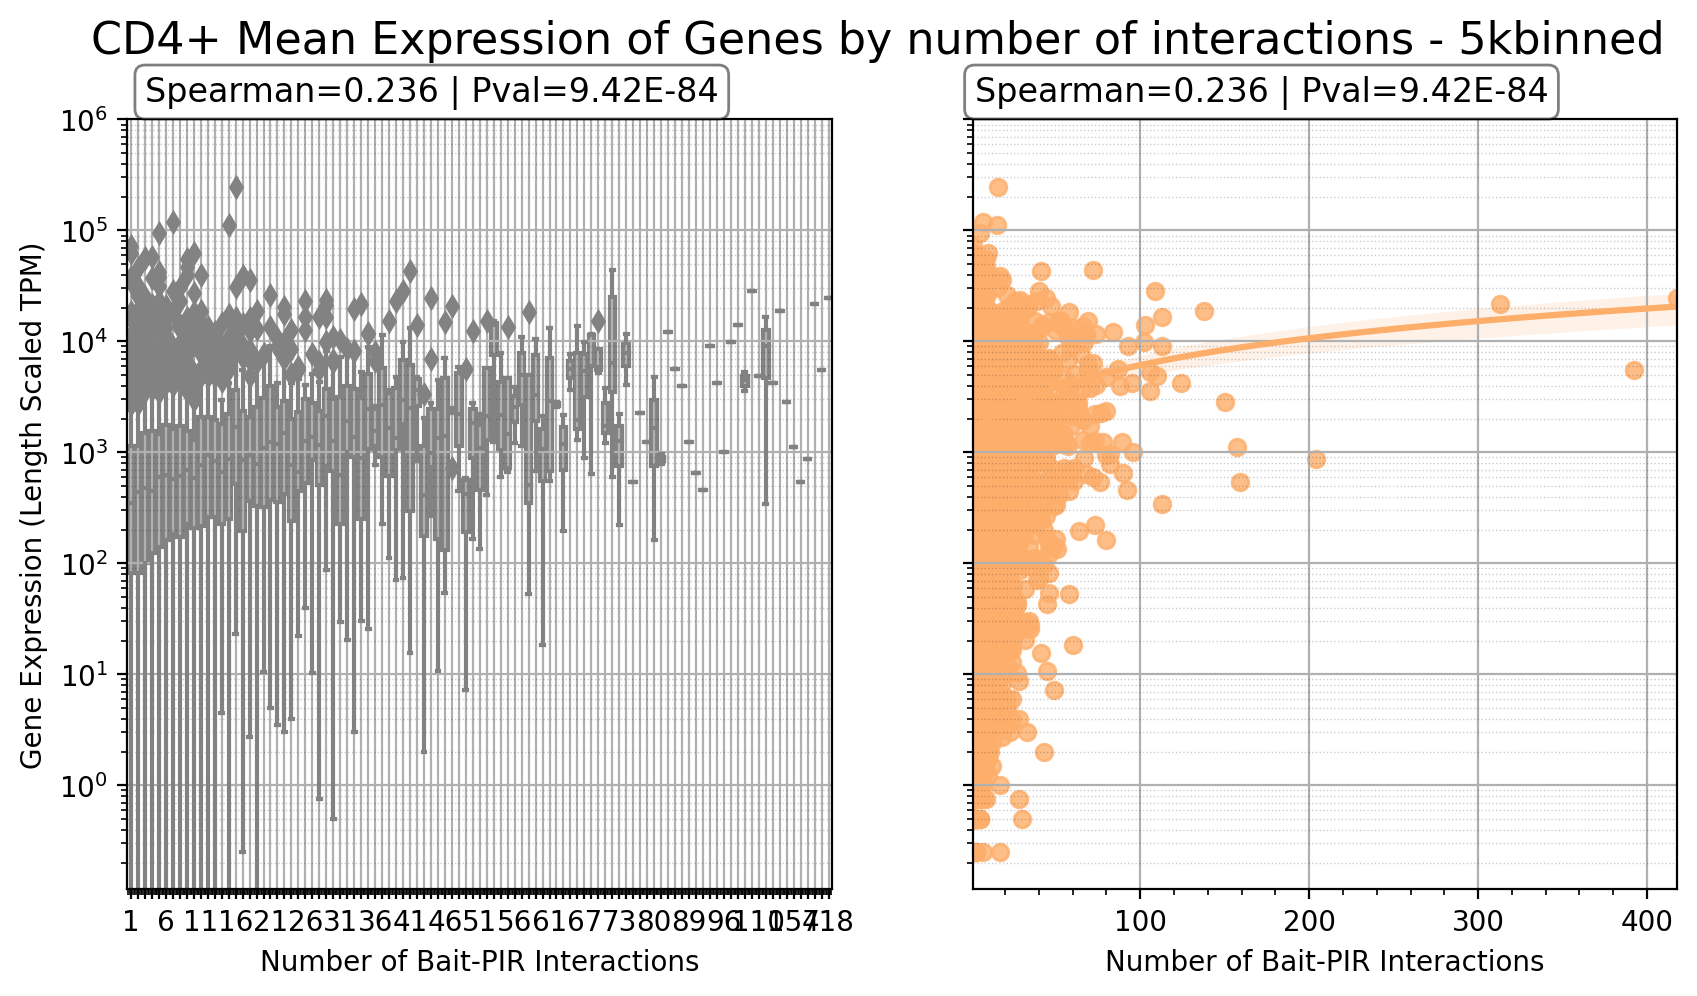

In [29]:
utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="CD4_DpnII_enhancer_count_bins",  plot=True, mean_col="CD4_mean", title="CD4+ Mean Expression of Genes by number of interactions - 5kbinned",
           plot_filename="./figures/CD4_mean_expression_NumberInteractions_DpnII_5kbinned")

/Users/caz3so/scratch/20200629_Spivakov_pcHiC_analysis_summary/utils.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10**6)


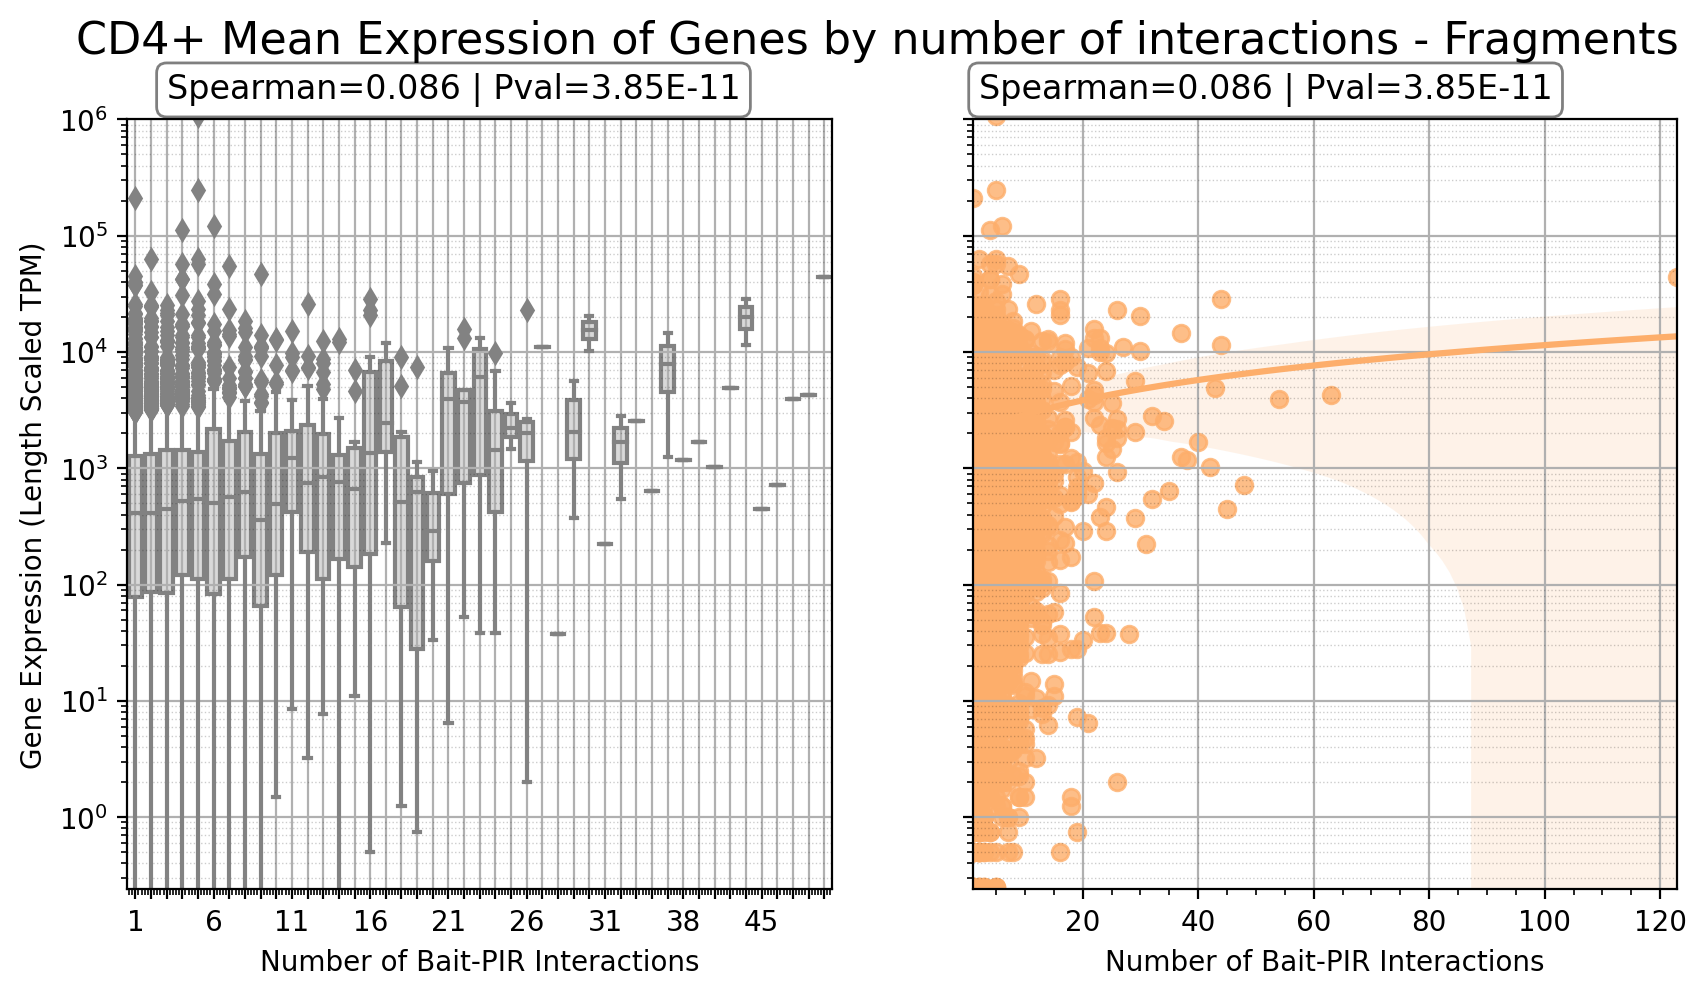

In [30]:
utils.expression_cutoff_analysis(GENE_COUNTS, feature_col="CD4_DpnII_enhancer_counts_fragments",  plot=True, mean_col="CD4_mean", title="CD4+ Mean Expression of Genes by number of interactions - Fragments",
           plot_filename="./figures/CD4_mean_expression_NumberInteractions_DpnII_fragments")